Làm sao để có tính ổn định cao , xem các chiều 
vẽ lại các Acc từng trường hợp 1 ,2,3,4 ( có cộng dồn và không cộng dồn )
Xem kĩ lại dưx liệu xem có ổn định hay không , thử xem nhóm ổn định ( Reasample) , xem khái niệm varian
Tìm giải thuật để tìm best par
tìm lại siêu tham số ( tìm các giải thuật cổ điển để tìm tham số )
!!! Xem nhiều hơn về tính ổn định , 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    train_test_split,
    KFold
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)
import random
from sklearn.model_selection import cross_val_score
from datetime import datetime, timedelta
import datetime
from imblearn.over_sampling import SMOTE
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import make_classification



2024-03-21 12:49:53.145415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('lab.csv')
data = pd.read_csv('Sumlab.csv')

In [4]:
df

,studentID,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,...,Prelab4-questions,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit
0,2113519,9.9,13.0,10.0,1.364,550.133333,1.644752e+09,9.272,10.0,10.0,...,7.0,4.285714,72.166667,1.650386e+09,8.750,9.0,8.0,1.25,35.616667,1.651856e+09
1,2110196,10.0,19.0,10.0,4.200,579.316667,1.644850e+09,9.236,14.0,10.0,...,7.0,0.000000,0.150000,1.650339e+09,0.000,0.0,0.0,0.00,0.000000,0.000000e+00
2,1911660,10.0,15.0,10.0,0.500,148.933333,1.643299e+09,10.000,13.0,10.0,...,7.0,0.000000,118.950000,1.650177e+09,9.875,8.0,8.0,0.00,24.900000,1.651047e+09
3,2052555,10.0,12.0,10.0,0.100,22.600000,1.642844e+09,10.000,11.0,10.0,...,7.0,0.000000,0.383333,1.649640e+09,10.000,8.0,8.0,0.00,1.033333,1.649643e+09
4,2153379,10.0,10.0,10.0,0.000,3.100000,1.642775e+09,10.000,10.0,10.0,...,7.0,1.428571,40.916667,1.649903e+09,10.000,8.0,8.0,0.00,1.466667,1.650333e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2153538,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000,0.0,0.0,0.00,0.000000,0.000000e+00
782,1652026,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000,0.0,0.0,0.00,0.000000,0.000000e+00
783,1915901,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000,0.0,0.0,0.00,0.000000,0.000000e+00
784,1710710,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0.000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000,0.0,0.0,0.00,0.000000,0.000000e+00


In [5]:
def ranking(score):
    if score >= 8.5:
        return 4
    if score >= 7.0:
        return 3
    if score >= 5.5:
        return 2
    if score >= 4.0:
        return 1
    return 0
def passRanking(x):
    if x >= 5:
        return 1
    else:
        return 0

# Áp dụng hàm ranking cho cột "inlab"
#data['Inlab'] = data['Inlab'].apply(passRanking)

# Hiển thị DataFrame sau khi thêm cột mới
#data['Inlab'].value_counts()
# Áp dụng hàm ranking cho cột "inlab"
columns_to_rank = ['Inlab1', 'Inlab2', 'Inlab3', 'Inlab4']
for column in columns_to_rank:
    df[column] = df[column].apply(ranking)

df['Inlab4'].value_counts()

Inlab4
4    610
0    127
2     21
3     17
1     11
Name: count, dtype: int64

In [6]:
df

,studentID,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,...,Prelab4-questions,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit
0,2113519,9.9,13.0,10.0,1.364,550.133333,1.644752e+09,4,10.0,10.0,...,7.0,4.285714,72.166667,1.650386e+09,4,9.0,8.0,1.25,35.616667,1.651856e+09
1,2110196,10.0,19.0,10.0,4.200,579.316667,1.644850e+09,4,14.0,10.0,...,7.0,0.000000,0.150000,1.650339e+09,0,0.0,0.0,0.00,0.000000,0.000000e+00
2,1911660,10.0,15.0,10.0,0.500,148.933333,1.643299e+09,4,13.0,10.0,...,7.0,0.000000,118.950000,1.650177e+09,4,8.0,8.0,0.00,24.900000,1.651047e+09
3,2052555,10.0,12.0,10.0,0.100,22.600000,1.642844e+09,4,11.0,10.0,...,7.0,0.000000,0.383333,1.649640e+09,4,8.0,8.0,0.00,1.033333,1.649643e+09
4,2153379,10.0,10.0,10.0,0.000,3.100000,1.642775e+09,4,10.0,10.0,...,7.0,1.428571,40.916667,1.649903e+09,4,8.0,8.0,0.00,1.466667,1.650333e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2153538,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0,0.0,0.0,0.00,0.000000,0.000000e+00
782,1652026,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0,0.0,0.0,0.00,0.000000,0.000000e+00
783,1915901,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0,0.0,0.0,0.00,0.000000,0.000000e+00
784,1710710,0.0,0.0,0.0,0.000,0.000000,0.000000e+00,0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0,0.0,0.0,0.00,0.000000,0.000000e+00


In [7]:

df = df[df['Prelab1-attempts']>5]
df = df[df['Prelab2-attempts']>5]
df = df[df['Prelab3-attempts']>5]
df = df[df['Prelab4-attempts']>5]

df


,studentID,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,...,Prelab4-questions,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit
0,2113519,9.900,13.0,10.0,1.364,550.133333,1.644752e+09,4,10.0,10.0,...,7.0,4.285714,72.166667,1.650386e+09,4,9.0,8.0,1.25,35.616667,1.651856e+09
1,2110196,10.000,19.0,10.0,4.200,579.316667,1.644850e+09,4,14.0,10.0,...,7.0,0.000000,0.150000,1.650339e+09,0,0.0,0.0,0.00,0.000000,0.000000e+00
2,1911660,10.000,15.0,10.0,0.500,148.933333,1.643299e+09,4,13.0,10.0,...,7.0,0.000000,118.950000,1.650177e+09,4,8.0,8.0,0.00,24.900000,1.651047e+09
3,2052555,10.000,12.0,10.0,0.100,22.600000,1.642844e+09,4,11.0,10.0,...,7.0,0.000000,0.383333,1.649640e+09,4,8.0,8.0,0.00,1.033333,1.649643e+09
4,2153379,10.000,10.0,10.0,0.000,3.100000,1.642775e+09,4,10.0,10.0,...,7.0,1.428571,40.916667,1.649903e+09,4,8.0,8.0,0.00,1.466667,1.650333e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2152935,10.000,10.0,10.0,0.000,153.516667,1.644849e+09,2,11.0,10.0,...,7.0,0.000000,2.166667,1.650273e+09,0,8.0,8.0,0.00,23.500000,1.650350e+09
739,2033308,8.464,11.0,10.0,0.182,11.133333,1.644858e+09,4,11.0,10.0,...,7.0,0.000000,10.716667,1.650300e+09,4,8.0,8.0,0.00,2.783333,1.650702e+09
742,513x1031,4.500,6.0,6.0,0.000,1.933333,1.644858e+09,0,0.0,0.0,...,7.0,0.000000,133.533333,1.650176e+09,0,0.0,0.0,0.00,0.000000,0.000000e+00
743,2152950,9.000,9.0,9.0,0.000,1.300000,1.644854e+09,4,11.0,10.0,...,7.0,0.000000,0.333333,1.650376e+09,4,8.0,8.0,0.00,3.083333,1.650253e+09


In [8]:
df.columns

Index(['studentID', 'Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2', 'Inlab2-attempts', 'Inlab2-questions',
       'Inlab2-growths', 'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3',
       'Prelab3-attempts', 'Prelab3-questions', 'Prelab3-growths',
       'Prelab3-timeSpent', 'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts',
       'Inlab3-questions', 'Inlab3-growths', 'Inlab3-timeSpent',
       'Inlab3-lastSubmit', 'Prelab4', 'Prelab4-attempts', 'Prelab4-questions',
       'Prelab4-growths', 'Prelab4-timeSpent', 'Prelab4-lastSubmit', 'Inlab4',
       'Inlab4-attempts', 'Inlab4-questions', 'Inlab4-growths',
       'Inlab4-timeSpent', 'Inlab4-lastSubmit'],


# Pre1 => Lab1

In [9]:
# có vẻ như thiếu labNum
X1 = df[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit']]
Y1 = df['Inlab1']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
y_train1.value_counts()

Inlab1
4    380
3     36
0     27
2     22
1     15
Name: count, dtype: int64

In [ ]:

'''from sklearn.feature_selection import chi2
import numpy as np

# Assume X_train2 is your feature matrix (training set)
# and y_train2 is your target variable (training labels)

# Tính giá trị chi-squared và p-value cho từng feature
chi2_values, p_values = chi2(X1,Y1)

# In ra giá trị chi-squared và p-value cho từng feature
for i in range(len(chi2_values)):
    print(f"Feature {i+1}: Chi2 Value = {chi2_values[i]}, p-value = {p_values[i]}")

# Lưu ý: Giả sử X_train2 là ma trận đặc trưng (feature matrix) của bạn và y_train2 là nhãn tương ứng.
# Hãy điều chỉnh mã này tùy thuộc vào cách bạn tổ chức dữ liệu của mình.
    

   Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Scores: [0.71551724 0.68695652 0.70434783 0.73913043 0.69565217]
Mean Cross-Validation Score: 0.7083208395802099
Accuracy for Random Forest: 0.8
'''

'from sklearn.feature_selection import chi2\nimport numpy as np\n\n# Assume X_train2 is your feature matrix (training set)\n# and y_train2 is your target variable (training labels)\n\n# Tính giá trị chi-squared và p-value cho từng feature\nchi2_values, p_values = chi2(X1,Y1)\n\n# In ra giá trị chi-squared và p-value cho từng feature\nfor i in range(len(chi2_values)):\n    print(f"Feature {i+1}: Chi2 Value = {chi2_values[i]}, p-value = {p_values[i]}")\n\n# Lưu ý: Giả sử X_train2 là ma trận đặc trưng (feature matrix) của bạn và y_train2 là nhãn tương ứng.\n# Hãy điều chỉnh mã này tùy thuộc vào cách bạn tổ chức dữ liệu của mình.\n    \n\n   Best Parameters: {\'max_depth\': None, \'min_samples_leaf\': 4, \'min_samples_split\': 2, \'n_estimators\': 100}\nCross-Validation Scores: [0.71551724 0.68695652 0.70434783 0.73913043 0.69565217]\nMean Cross-Validation Score: 0.7083208395802099\nAccuracy for Random Forest: 0.8\n'

In [10]:
import time

# Bắt đầu đo thời gian
start_time = time.time()

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Đặt các tham số cần điều chỉnh
param_grid = {
    'n_estimators': [500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search.fit(X_train1, y_train1)

# Kết thúc đo thời gian và tính thời gian đã trôi qua
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Lấy thông tin về tham số tốt nhất và tiếp tục như bình thường
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# Tạo mô hình mới với các tham số tối ưu
best_rf_model = RandomForestClassifier(random_state=42,max_features=4, **best_params)
# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_rf_model, X_train1, y_train1, cv=5, scoring='accuracy')
# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())
# Huấn luyện mô hình trên toàn bộ tập huấn luyện
best_rf_model.fit(X_train1, y_train1)
# Dự đoán trên tập kiểm thử
y_pred = best_rf_model.predict(X_test1)
# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Random1 = accuracy_score(y_test1, y_pred)
print("Accuracy for Random Forest:", accuracy_Random1)


Training Time: 4.7982752323150635 seconds
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Cross-Validation Scores: [0.78125    0.79166667 0.78125    0.79166667 0.80208333]
Mean Cross-Validation Score: 0.7895833333333333
Accuracy for Random Forest: 0.7666666666666667


In [11]:
#  mô hình Logistic Regression
start_time = time.time()
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")
# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.1]}
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")
# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train1, y_train1)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis1 = accuracy_score(y_test1, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis1)


Training Time: 6.389617919921875e-05 seconds
Training Time: 0.1062929630279541 seconds
Best C: 0.1
Cross-Validation Scores: [0.79166667 0.79166667 0.79166667 0.79166667 0.79166667]
Mean Cross-Validation Score: 0.7916666666666666
Accuracy for Logistic Regression: 0.7583333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train1, y_train1)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis1 = accuracy_score(y_test1, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis1)


Best C: 0.001
Cross-Validation Scores: [0.69827586 0.70434783 0.70434783 0.70434783 0.70434783]
Mean Cross-Validation Score: 0.7031334332833583
Accuracy for Logistic Regression: 0.7655172413793103


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train1, y_train1)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis1 = accuracy_score(y_test1, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis1)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best C: 0.1
Cross-Validation Scores: [0.79166667 0.79166667 0.79166667 0.79166667 0.80208333]
Mean Cross-Validation Score: 0.79375
Accuracy for Logistic Regression: 0.75


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
start_time = time.time()
training_time = time.time() - start_time

# Xác định các giá trị bạn muốn thử nghiệm
param_grid_ann = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'max_iter': [500]
}

# Tạo mô hình Neural Network
ann_model = MLPClassifier(random_state=42)

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_ann = GridSearchCV(ann_model, param_grid_ann, cv=5)
grid_search_ann.fit(X_train1, y_train1)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra giá trị tốt nhất của các tham số
best_params_ann = grid_search_ann.best_params_
print("Best Parameters for ANN:", best_params_ann)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_ann_model = MLPClassifier(**best_params_ann, random_state=42)
best_ann_model.fit(X_train1, y_train1)

# Thực hiện cross-validation trên mô hình ANN mới
ann_cross_val_scores = cross_val_score(best_ann_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("ANN Cross-Validation Scores:", ann_cross_val_scores)
print("Mean ANN Cross-Validation Score:", ann_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_ann = best_ann_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình ANN sau khi tinh chỉnh
accuracy_ann1 = accuracy_score(y_test1, y_pred_ann)
print("Accuracy for ANN:", accuracy_ann1)


Training Time: 0.16324400901794434 seconds
Best Parameters for ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 500, 'solver': 'adam'}
ANN Cross-Validation Scores: [0.79166667 0.79166667 0.79166667 0.79166667 0.79166667]
Mean ANN Cross-Validation Score: 0.7916666666666666
Accuracy for ANN: 0.7583333333333333


In [13]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'max_iter': [500, 1000, 1500],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test1)

# Measure accuracy
accuracy_MLP1 = accuracy_score(y_pred_best, y_test1)
print(f"Best model accuracy: {accuracy_MLP1}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:
{'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 500}
Best model accuracy: 0.7583333333333333


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

# Print the best parameters found
print("Best parameters found for MLP:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test1)

# Measure accuracy
accuracy_MLP_CV1 = accuracy_score(y_pred_best, y_test1)
print(f"Best model accuracy for MLP: {accuracy_MLP_CV1}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: 

Best parameters found for MLP:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate': 'invscaling', 'max_iter': 1000, 'solver': 'adam'}
Best model accuracy for MLP: 0.7655172413793103


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

# Print the best parameters found
print("Best parameters found for MLP:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test1)

# Measure accuracy
accuracy_MLP_CV1 = accuracy_score(y_pred_best, y_test1)
print(f"Best model accuracy for MLP: {accuracy_MLP_CV1}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Xác định các giá trị bạn muốn thử nghiệm
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500, 1000]
}

# Tạo mô hình Neural Network
ann_model = MLPClassifier(random_state=42)

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_ann = GridSearchCV(ann_model, param_grid_ann, cv=5)
grid_search_ann.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của các tham số
best_params_ann = grid_search_ann.best_params_
print("Best Parameters for ANN:", best_params_ann)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_ann_model = MLPClassifier(**best_params_ann, random_state=42)
best_ann_model.fit(X_train1, y_train1)

# Thực hiện cross-validation trên mô hình ANN mới
ann_cross_val_scores = cross_val_score(best_ann_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("ANN Cross-Validation Scores:", ann_cross_val_scores)
print("Mean ANN Cross-Validation Score:", ann_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_ann = best_ann_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình ANN sau khi tinh chỉnh
accuracy_ann1 = accuracy_score(y_test1, y_pred_ann)
print("Accuracy for ANN:", accuracy_ann1)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: 

Best Parameters for ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 200, 'solver': 'adam'}
ANN Cross-Validation Scores: [0.69827586 0.70434783 0.70434783 0.70434783 0.70434783]
Mean ANN Cross-Validation Score: 0.7031334332833583
Accuracy for ANN: 0.7655172413793103


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-

In [14]:
# KNN 
k_values = [9]
start_time = time.time()
training_time = time.time() - start_time

# Xác định các tham số bạn muốn thử nghiệm
param_grid_knn = {'n_neighbors': k_values, 'weights': ['uniform'], 'p': [2]}

# Tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của các tham số
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train1, y_train1)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Thực hiện cross-validation trên mô hình KNN mới
knn_cross_val_scores = cross_val_score(best_knn_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("KNN Cross-Validation Scores:", knn_cross_val_scores)
print("Mean KNN Cross-Validation Score:", knn_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_knn = best_knn_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình KNN sau khi tinh chỉnh
accuracy_knn1 = accuracy_score(y_test1, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn1)


Best Parameters for KNN: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Training Time: 0.06968879699707031 seconds
KNN Cross-Validation Scores: [0.79166667 0.79166667 0.77083333 0.80208333 0.79166667]
Mean KNN Cross-Validation Score: 0.7895833333333333
Accuracy for KNN: 0.725


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Thực hiện cross-validation trên mô hình Bagging
bagging_cross_val_scores = cross_val_score(bagging_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Bagging Cross-Validation Scores:", bagging_cross_val_scores)
print("Mean Bagging Cross-Validation Score:", bagging_cross_val_scores.mean())

# Huấn luyện mô hình Bagging trên toàn bộ tập huấn luyện
bagging_model.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử
y_pred_bagging = bagging_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình Bagging
accuracy_Random_bagging_cross1 = accuracy_score(y_test1, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_bagging_cross1)


Bagging Cross-Validation Scores: [0.68103448 0.68695652 0.70434783 0.71304348 0.69565217]
Mean Bagging Cross-Validation Score: 0.6962068965517241
Accuracy for Bagging: 0.7793103448275862


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, random_state=42)

# Xác định các giá trị bạn muốn thử nghiệm cho tham số n_estimators và max_features
param_grid_bagging = {'n_estimators': [10, 50, 100], 'max_features': [0.5, 0.7, 1.0]}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của các tham số
best_params_bagging = grid_search_bagging.best_params_
print("Best Parameters for Bagging:", best_params_bagging)

# Tạo mô hình Bagging mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_bagging_model = BaggingClassifier(base_model, **best_params_bagging, random_state=42)
best_bagging_model.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử
y_pred_bagging = best_bagging_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình Bagging sau khi tinh chỉnh
accuracy_Random_GridSearchCV_bagging1 = accuracy_score(y_test1, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_GridSearchCV_bagging1)


Best Parameters for Bagging: {'max_features': 0.7, 'n_estimators': 50}
Accuracy for Bagging: 0.7931034482758621


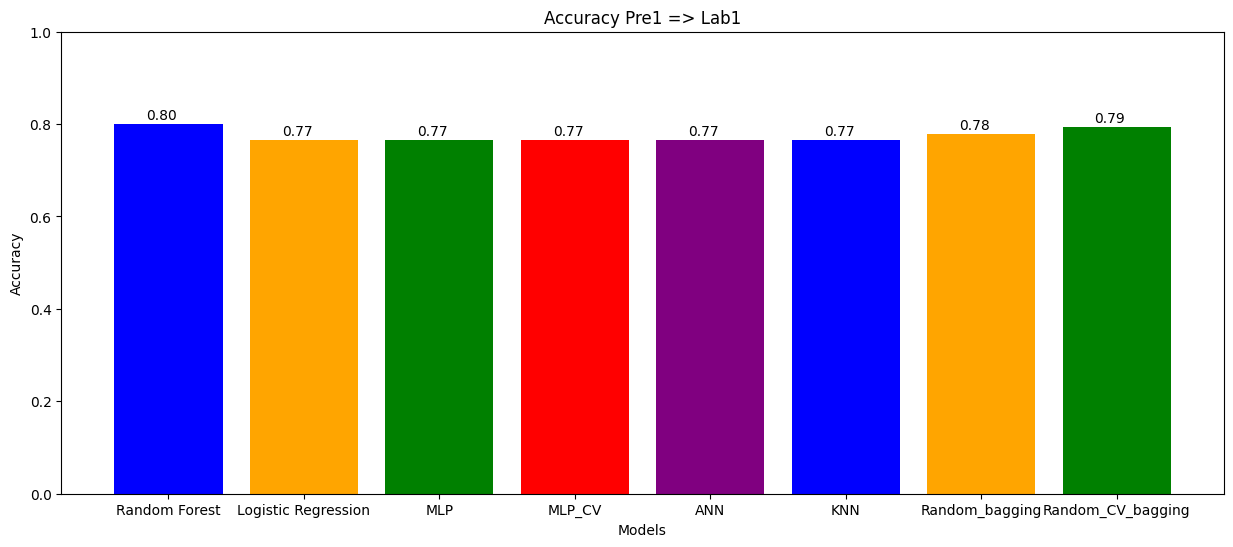

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Độ chính xác của các mô hình
accuracies = [accuracy_Random1, accuracy_Logistis1,accuracy_MLP1,accuracy_MLP_CV1, accuracy_ann1, accuracy_knn1, accuracy_Random_bagging_cross1,accuracy_Random_GridSearchCV_bagging1]

# Tên của các mô hình
model_names = ['Random Forest', 'Logistic Regression','MLP','MLP_CV', 'ANN', 'KNN', 'Random_bagging','Random_CV_bagging']


# Vẽ biểu đồ bar
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Pre1 => Lab1')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1

# Thêm giá trị của từng cột
for bar, accuracy in zip(bars.patches, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', color='black')

plt.show()


# Pre1, lab1, pre2 => Lab2

In [15]:
# có vẻ như thiếu labNum
X2 = df[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit']]
Y2 = df['Inlab2']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2,stratify=Y2, test_size=0.2, random_state=42)
y_train2.value_counts()

Inlab2
4    433
3     26
1      8
0      7
2      6
Name: count, dtype: int64

In [16]:
start_time = time.time()
training_time = time.time() - start_time
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
# Đặt các tham số cần điều chỉnh
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra các tham số tối ưu
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Tạo mô hình mới với các tham số tối ưu
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_rf_model, X_train2, y_train2, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


# Huấn luyện mô hình trên toàn bộ tập huấn luyện
best_rf_model.fit(X_train2, y_train2)

# Dự đoán trên tập kiểm thử
y_pred = best_rf_model.predict(X_test2)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Random2 = accuracy_score(y_test2, y_pred)
print("Accuracy for Random Forest:", accuracy_Random2)


Training Time: 1.2808377742767334 seconds
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation Scores: [0.90625    0.90625    0.90625    0.89583333 0.88541667]
Mean Cross-Validation Score: 0.9
Accuracy for Random Forest: 0.9083333333333333


In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.01]}
start_time = time.time()
training_time = time.time() - start_time

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train2, y_train2)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train2, y_train2, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test2)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis2 = accuracy_score(y_test2, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis2)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Training Time: 0.2977578639984131 seconds
Best C: 0.01
Cross-Validation Scores: [0.90625    0.90625    0.90625    0.89583333 0.89583333]
Mean Cross-Validation Score: 0.9020833333333333
Accuracy for Logistic Regression: 0.9


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [18]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
start_time = time.time()
training_time = time.time() - start_time
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'max_iter': [1500],
    'learning_rate_init': [0.1],
    'alpha': [0.0001]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train2, y_train2)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test2)

# Measure accuracy
accuracy_MLP2 = accuracy_score(y_pred_best, y_test1)
print(f"Best model accuracy: {accuracy_MLP2}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training Time: 0.152907133102417 seconds
Best parameters found:
{'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'max_iter': 1500}
Best model accuracy: 0.7583333333333333


In [ ]:
#ANN

In [19]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Xác định các giá trị k bạn muốn thử nghiệm
k_values = [5]
start_time = time.time()
training_time = time.time() - start_time
# Xác định các tham số bạn muốn thử nghiệm
param_grid_knn = {'n_neighbors': k_values, 'weights': ['uniform'], 'p': [2]}

# Tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train2, y_train2)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra giá trị tốt nhất của các tham số
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train2, y_train2)

# Thực hiện cross-validation trên mô hình KNN mới
knn_cross_val_scores = cross_val_score(best_knn_model, X_train2, y_train2, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("KNN Cross-Validation Scores:", knn_cross_val_scores)
print("Mean KNN Cross-Validation Score:", knn_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_knn = best_knn_model.predict(X_test2)

# Đánh giá hiệu suất của mô hình KNN sau khi tinh chỉnh
accuracy_knn2 = accuracy_score(y_test2, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn2)


Training Time: 0.11803197860717773 seconds
Best Parameters for KNN: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNN Cross-Validation Scores: [0.90625    0.90625    0.90625    0.89583333 0.88541667]
Mean KNN Cross-Validation Score: 0.9
Accuracy for KNN: 0.8833333333333333


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Thực hiện cross-validation trên mô hình Bagging
bagging_cross_val_scores2 = cross_val_score(bagging_model, X_train2, y_train2, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Bagging Cross-Validation Scores:", bagging_cross_val_scores2)
accuracies = print("Mean Bagging Cross-Validation Score:", bagging_cross_val_scores2.mean())




Bagging Cross-Validation Scores: [0.81896552 0.84347826 0.85217391 0.84347826 0.83478261]
Mean Bagging Cross-Validation Score: 0.838575712143928


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, random_state=42)

# Xác định các giá trị bạn muốn thử nghiệm cho tham số n_estimators và max_features
param_grid_bagging = {'n_estimators': [10, 50, 100], 'max_features': [0.5, 0.7, 1.0]}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train2, y_train2)

# In ra giá trị tốt nhất của các tham số
best_params_bagging = grid_search_bagging.best_params_
print("Best Parameters for Bagging:", best_params_bagging)

# Tạo mô hình Bagging mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_bagging_model = BaggingClassifier(base_model, **best_params_bagging, random_state=42)
best_bagging_model.fit(X_train2, y_train2)

# Dự đoán trên tập kiểm thử
y_pred_bagging = best_bagging_model.predict(X_test2)

# Đánh giá hiệu suất của mô hình Bagging sau khi tinh chỉnh
accuracy_Random_GridSearchCV_bagging2 = accuracy_score(y_test2, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_GridSearchCV_bagging2)


Best Parameters for Bagging: {'max_features': 0.5, 'n_estimators': 10}
Accuracy for Bagging: 0.8482758620689655


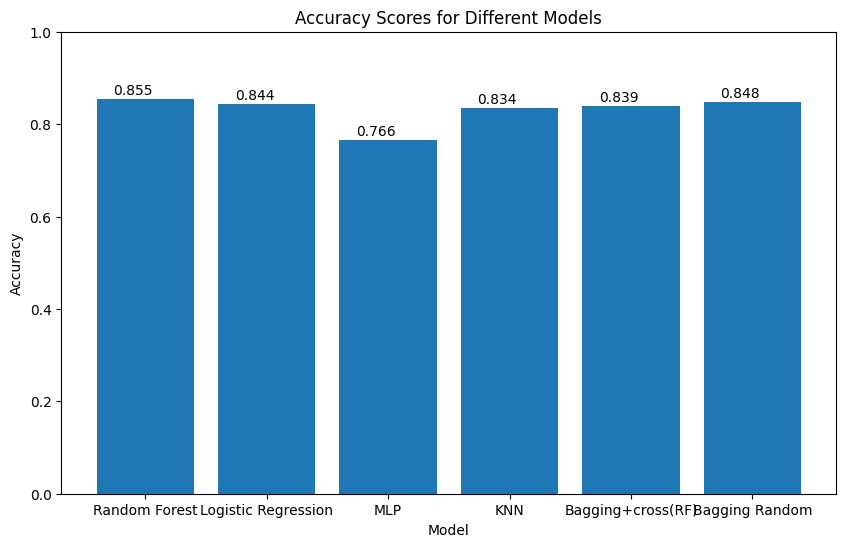

In [ ]:
import matplotlib.pyplot as plt

# Các giá trị accuracy
accuracy_values = [0.8551724137931035, 0.8437781109445277, 0.7655172413793103, 0.8344827586206897, 0.838575712143928, 0.8482758620689655]

# Tên của các mô hình
model_names = ['Random Forest', 'Logistic Regression', 'MLP', 'KNN', 'Bagging+cross(RF)', 'Bagging Random']

# Hiển thị biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values)

plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Điều chỉnh giới hạn trục y nếu cần thiết

# Thêm chú thích cho từng cột
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center')

plt.show()


# Pre1,lab1,pre2,lab2,pre3 => lab3

In [20]:
# có vẻ như thiếu labNum
X3 = df[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2', 'Inlab2-attempts', 'Inlab2-questions',
       'Inlab2-growths', 'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3',
       'Prelab3-attempts', 'Prelab3-questions', 'Prelab3-growths',
       'Prelab3-timeSpent', 'Prelab3-lastSubmit']]
Y3 = df['Inlab3']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42)
y_train1.value_counts()

Inlab1
4    380
3     36
0     27
2     22
1     15
Name: count, dtype: int64

In [21]:
start_time = time.time()
training_time = time.time() - start_time


# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Đặt các tham số cần điều chỉnh
param_grid = {
    'n_estimators': [500],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train3, y_train3)

# In ra các tham số tối ưu
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Tạo mô hình mới với các tham số tối ưu
best_rf_model = RandomForestClassifier(random_state=42,max_features=4, **best_params)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_rf_model, X_train3, y_train3, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


# Huấn luyện mô hình trên toàn bộ tập huấn luyện
best_rf_model.fit(X_train3, y_train3)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Dự đoán trên tập kiểm thử
y_pred = best_rf_model.predict(X_test3)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Random = accuracy_score(y_test3, y_pred)
print("Accuracy for Random Forest:", accuracy_Random)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Cross-Validation Scores: [0.92708333 0.92708333 0.92708333 0.92708333 0.92708333]
Mean Cross-Validation Score: 0.9270833333333334
Training Time: 10.479001998901367 seconds
Accuracy for Random Forest: 0.9083333333333333


In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start_time = time.time()
training_time = time.time() - start_time


# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.001]}

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train3, y_train3)


training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train3, y_train3)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train3, y_train3, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test3)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis = accuracy_score(y_test3, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 0.2114870548248291 seconds
Best C: 0.001
Cross-Validation Scores: [0.91666667 0.92708333 0.92708333 0.92708333 0.92708333]
Mean Cross-Validation Score: 0.925
Accuracy for Logistic Regression: 0.9083333333333333


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
start_time = time.time()




# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(150,)],
    'max_iter': [1000],
    'learning_rate_init': [0.1],
    'alpha': [0.01]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train3, y_train3)


training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test3)

# Measure accuracy
accuracy_MLP = accuracy_score(y_pred_best, y_test3)
print(f"Best model accuracy: {accuracy_MLP}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training Time: 0.5214970111846924 seconds
Best parameters found:
{'alpha': 0.01, 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.1, 'max_iter': 1000}
Best model accuracy: 0.9083333333333333


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
training_time = time.time() - start_time



# Xác định các giá trị k bạn muốn thử nghiệm
k_values = [3]

# Xác định các tham số bạn muốn thử nghiệm
param_grid_knn = {'n_neighbors': k_values, 'weights': ['uniform'], 'p': [1]}

# Tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train3, y_train3)

# In ra giá trị tốt nhất của các tham số
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train3, y_train3)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Thực hiện cross-validation trên mô hình KNN mới
knn_cross_val_scores = cross_val_score(best_knn_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("KNN Cross-Validation Scores:", knn_cross_val_scores)
print("Mean KNN Cross-Validation Score:", knn_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_knn = best_knn_model.predict(X_test3)

# Đánh giá hiệu suất của mô hình KNN sau khi tinh chỉnh
accuracy_knn = accuracy_score(y_test3, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn)


Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Training Time: 0.07692909240722656 seconds
KNN Cross-Validation Scores: [0.76041667 0.73958333 0.73958333 0.72916667 0.73958333]
Mean KNN Cross-Validation Score: 0.7416666666666667
Accuracy for KNN: 0.875


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Thực hiện cross-validation trên mô hình Bagging
bagging_cross_val_scores = cross_val_score(bagging_model, X_train3, y_train3, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Bagging Cross-Validation Scores:", bagging_cross_val_scores)
print("Mean Bagging Cross-Validation Score:", bagging_cross_val_scores.mean())

# Huấn luyện mô hình Bagging trên toàn bộ tập huấn luyện
bagging_model.fit(X_train3, y_train3)

# Dự đoán trên tập kiểm thử
y_pred_bagging = bagging_model.predict(X_test3)

# Đánh giá hiệu suất của mô hình Bagging
accuracy_Random_bagging_cross = accuracy_score(y_test3, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_bagging_cross)


Bagging Cross-Validation Scores: [0.86206897 0.86086957 0.85217391 0.86086957 0.86086957]
Mean Bagging Cross-Validation Score: 0.8593703148425786
Accuracy for Bagging: 0.8620689655172413


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, random_state=42)

# Xác định các giá trị bạn muốn thử nghiệm cho tham số n_estimators và max_features
param_grid_bagging = {'n_estimators': [10, 50, 100], 'max_features': [0.5, 0.7, 1.0]}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train3, y_train3)

# In ra giá trị tốt nhất của các tham số
best_params_bagging = grid_search_bagging.best_params_
print("Best Parameters for Bagging:", best_params_bagging)

# Tạo mô hình Bagging mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_bagging_model = BaggingClassifier(base_model, **best_params_bagging, random_state=42)
best_bagging_model.fit(X_train3, y_train3)

# Dự đoán trên tập kiểm thử
y_pred_bagging = best_bagging_model.predict(X_test3)

# Đánh giá hiệu suất của mô hình Bagging sau khi tinh chỉnh
accuracy_Random_GridSearchCV_bagging = accuracy_score(y_test3, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_GridSearchCV_bagging)


Best Parameters for Bagging: {'max_features': 0.5, 'n_estimators': 50}
Accuracy for Bagging: 0.8551724137931035


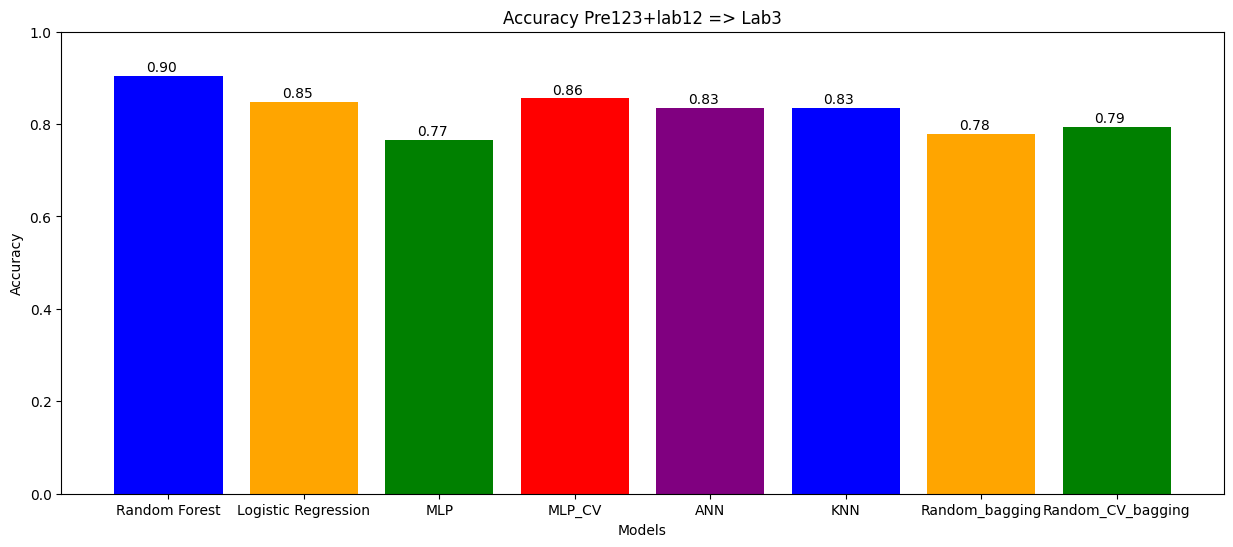

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Độ chính xác của các mô hình
accuracies = [accuracy_Random, accuracy_Logistis,accuracy_MLP,accuracy_MLP_CV, accuracy_ann, accuracy_knn, accuracy_Random_bagging_cross,accuracy_Random_GridSearchCV_bagging]

# Tên của các mô hình
model_names = ['Random Forest', 'Logistic Regression','MLP','MLP_CV', 'ANN', 'KNN', 'Random_bagging','Random_CV_bagging']


# Vẽ biểu đồ bar
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Pre123+lab12 => Lab3')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1

# Thêm giá trị của từng cột
for bar, accuracy in zip(bars.patches, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', color='black')

plt.show()


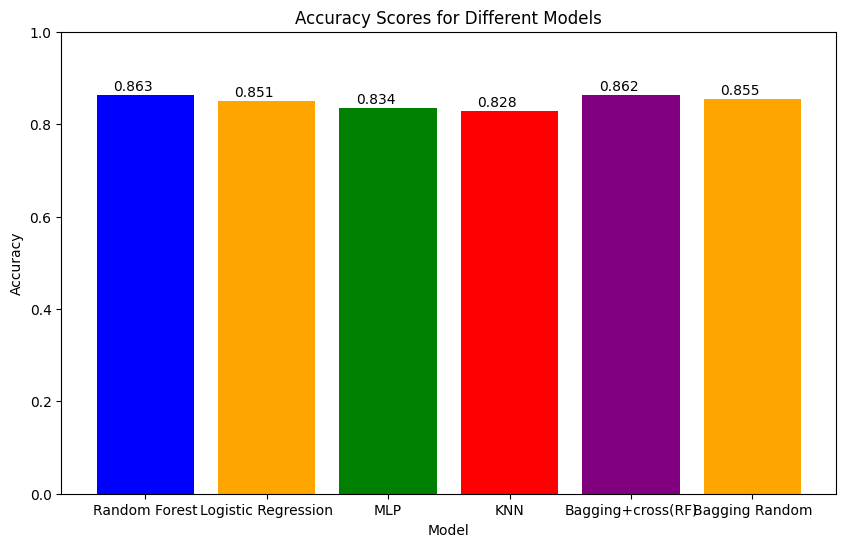

In [ ]:
import matplotlib.pyplot as plt

# Các giá trị accuracy
accuracy_values = [0.8628485757121439, 0.8507046476761619, 0.8344827586206897, 0.8275862068965517, 0.8620689655172413, 0.8551724137931035]

# Tên của các mô hình
model_names = ['Random Forest', 'Logistic Regression', 'MLP', 'KNN', 'Bagging+cross(RF)', 'Bagging Random']

# Hiển thị biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values,color=['blue', 'orange', 'green', 'red', 'purple','orange'])

plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Điều chỉnh giới hạn trục y nếu cần thiết

# Thêm chú thích cho từng cột
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center')

plt.show()


# Pre1,lab1, Pre2,lab2, Pre3,lab3, Pre 4 => lab4

In [27]:
# có vẻ như thiếu labNum
X4 = df[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2', 'Inlab2-attempts', 'Inlab2-questions',
       'Inlab2-growths', 'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3',
       'Prelab3-attempts', 'Prelab3-questions', 'Prelab3-growths',
       'Prelab3-timeSpent', 'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts',
       'Inlab3-questions', 'Inlab3-growths', 'Inlab3-timeSpent',
       'Inlab3-lastSubmit', 'Prelab4', 'Prelab4-attempts', 'Prelab4-questions',
       'Prelab4-growths', 'Prelab4-timeSpent', 'Prelab4-lastSubmit']]
Y4 = df['Inlab4']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4,stratify=Y4, test_size=0.2, random_state=42)
Y4.value_counts()

Inlab4
4    542
0     25
2     14
3     12
1      7
Name: count, dtype: int64

In [28]:
start_time = time.time()
training_time = time.time() - start_time

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Đặt các tham số cần điều chỉnh
param_grid = {
    'n_estimators': [ 1000],
    'max_depth': [None],
    'min_samples_split': [ 10],
    'min_samples_leaf': [1]
}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train4, y_train4)

# In ra các tham số tối ưu
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Tạo mô hình mới với các tham số tối ưu
best_rf_model = RandomForestClassifier(random_state=42,max_features=4, **best_params)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_rf_model, X_train4, y_train4, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


# Huấn luyện mô hình trên toàn bộ tập huấn luyện
best_rf_model.fit(X_train4, y_train4)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Dự đoán trên tập kiểm thử
y_pred = best_rf_model.predict(X_test4)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Random = accuracy_score(y_test4, y_pred)
print("Accuracy for Random Forest:", accuracy_Random)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
Cross-Validation Scores: [0.91666667 0.90625    0.90625    0.91666667 0.89583333]
Mean Cross-Validation Score: 0.9083333333333332
Training Time: 21.88868808746338 seconds
Accuracy for Random Forest: 0.9


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Xác định các giá trị C bạn muốn thử nghiệm
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho siêu tham số C
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train4, y_train4)

# In ra giá trị tốt nhất của siêu tham số C
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

# Tạo mô hình mới với siêu tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train4, y_train1)

# Thực hiện cross-validation trên mô hình mới
cross_val_scores = cross_val_score(best_logreg_model, X_train4, y_train4, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred = best_logreg_model.predict(X_test4)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Logistis = accuracy_score(y_test4, y_pred)
print("Accuracy for Logistic Regression:", accuracy_Logistis)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best C: 0.001
Cross-Validation Scores: [0.85344828 0.87826087 0.84347826 0.82608696 0.83478261]
Mean Cross-Validation Score: 0.8472113943028485
Accuracy for Logistic Regression: 0.8482758620689655


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [29]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
start_time = time.time()
training_time = time.time() - start_time



# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [ (150,)],
    'max_iter': [1000],
    'learning_rate_init': [0.001],
    'alpha': [ 0.01]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train4, y_train4)
training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test4)

# Measure accuracy
accuracy_MLP = accuracy_score(y_pred_best, y_test4)
print(f"Best model accuracy: {accuracy_MLP}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training Time: 0.2583341598510742 seconds
Best parameters found:
{'alpha': 0.01, 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.001, 'max_iter': 1000}
Best model accuracy: 0.9


In [ ]:
#MLP classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'max_iter': [500, 1000, 1500],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train4, y_train4)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test4)

# Measure accuracy
accuracy_MLP = accuracy_score(y_pred_best, y_test4)
print(f"Best model accuracy: {accuracy_MLP}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:
{'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.01, 'max_iter': 1500}
Best model accuracy: 0.8551724137931035


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

# Create an MLP classifier object
mlp_model = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train4, y_train4)

# Print the best parameters found
print("Best parameters found for MLP:")
print(grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test4)

# Measure accuracy
accuracy_MLP_CV = accuracy_score(y_pred_best, y_test4)
print(f"Best model accuracy for MLP: {accuracy_MLP_CV}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: 

Best parameters found for MLP:
{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}
Best model accuracy for MLP: 0.8551724137931035


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
training_time = time.time() - start_time


# Xác định các giá trị k bạn muốn thử nghiệm
k_values = [9]

# Xác định các tham số bạn muốn thử nghiệm
param_grid_knn = {'n_neighbors': k_values, 'weights': ['uniform'], 'p': [ 2]}

# Tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Sử dụng Grid Search để tìm giá trị tốt nhất cho các tham số
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train4, y_train4)

training_time = time.time() - start_time

# In ra thời gian huấn luyện
print("Training Time:", training_time, "seconds")

# In ra giá trị tốt nhất của các tham số
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

# Tạo mô hình mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train4, y_train4)

# Thực hiện cross-validation trên mô hình KNN mới
knn_cross_val_scores = cross_val_score(best_knn_model, X_train4, y_train4, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("KNN Cross-Validation Scores:", knn_cross_val_scores)
print("Mean KNN Cross-Validation Score:", knn_cross_val_scores.mean())

# Dự đoán trên tập kiểm thử
y_pred_knn = best_knn_model.predict(X_test4)

# Đánh giá hiệu suất của mô hình KNN sau khi tinh chỉnh
accuracy_knn = accuracy_score(y_test4, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn)


Training Time: 0.1334836483001709 seconds
Best Parameters for KNN: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
KNN Cross-Validation Scores: [0.90625    0.90625    0.90625    0.90625    0.89583333]
Mean KNN Cross-Validation Score: 0.9041666666666666
Accuracy for KNN: 0.9


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Thực hiện cross-validation trên mô hình Bagging
bagging_cross_val_scores = cross_val_score(bagging_model, X_train1, y_train1, cv=5, scoring='accuracy')

# In ra độ đo hiệu suất từ cross-validation
print("Bagging Cross-Validation Scores:", bagging_cross_val_scores)
print("Mean Bagging Cross-Validation Score:", bagging_cross_val_scores.mean())

# Huấn luyện mô hình Bagging trên toàn bộ tập huấn luyện
bagging_model.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử
y_pred_bagging = bagging_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình Bagging
accuracy_Random_bagging_cross = accuracy_score(y_test1, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_bagging_cross)


Bagging Cross-Validation Scores: [0.68103448 0.68695652 0.70434783 0.71304348 0.69565217]
Mean Bagging Cross-Validation Score: 0.6962068965517241
Accuracy for Bagging: 0.7793103448275862


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình cơ bản (Random Forest)
base_model = RandomForestClassifier(random_state=42)

# Tạo mô hình Bagging với Random Forest làm mô hình cơ bản
bagging_model = BaggingClassifier(base_model, random_state=42)

# Xác định các giá trị bạn muốn thử nghiệm cho tham số n_estimators và max_features
param_grid_bagging = {'n_estimators': [10, 50, 100], 'max_features': [0.5, 0.7, 1.0]}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất cho các tham số
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train1, y_train1)

# In ra giá trị tốt nhất của các tham số
best_params_bagging = grid_search_bagging.best_params_
print("Best Parameters for Bagging:", best_params_bagging)

# Tạo mô hình Bagging mới với các tham số tốt nhất và huấn luyện trên toàn bộ tập huấn luyện
best_bagging_model = BaggingClassifier(base_model, **best_params_bagging, random_state=42)
best_bagging_model.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử
y_pred_bagging = best_bagging_model.predict(X_test1)

# Đánh giá hiệu suất của mô hình Bagging sau khi tinh chỉnh
accuracy_Random_GridSearchCV_bagging = accuracy_score(y_test1, y_pred_bagging)
print("Accuracy for Bagging:", accuracy_Random_GridSearchCV_bagging)


Best Parameters for Bagging: {'max_features': 0.7, 'n_estimators': 50}
Accuracy for Bagging: 0.7931034482758621


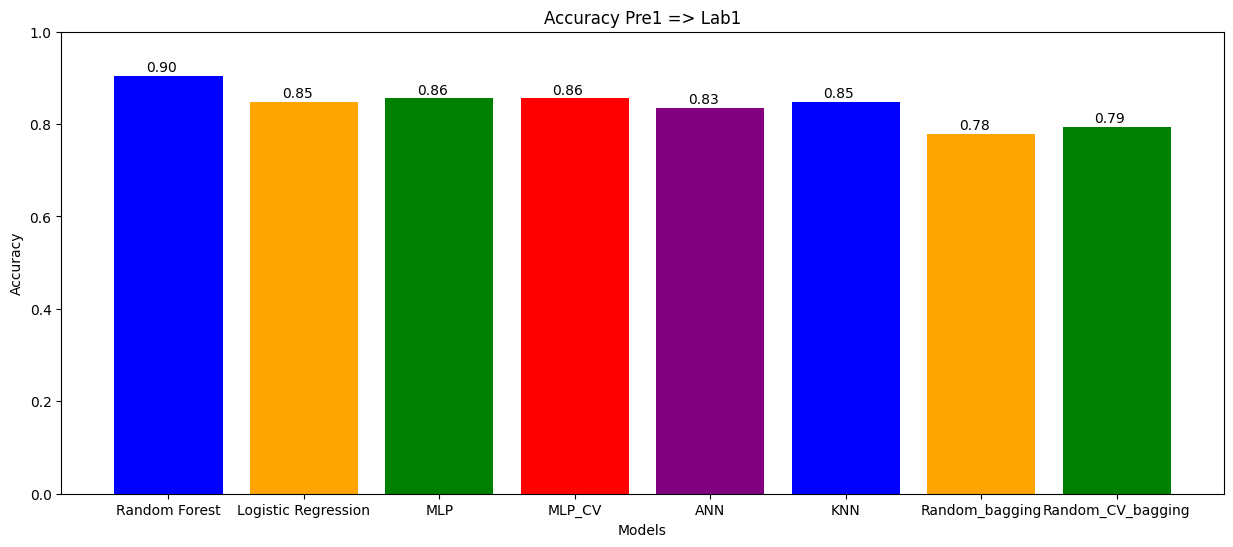

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Độ chính xác của các mô hình
accuracies = [accuracy_Random, accuracy_Logistis,accuracy_MLP,accuracy_MLP_CV, accuracy_ann, accuracy_knn, accuracy_Random_bagging_cross,accuracy_Random_GridSearchCV_bagging]

# Tên của các mô hình
model_names = ['Random Forest', 'Logistic Regression','MLP','MLP_CV', 'ANN', 'KNN', 'Random_bagging','Random_CV_bagging']

# Vẽ biểu đồ bar
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Pre1 => Lab1')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1

# Thêm giá trị của từng cột
for bar, accuracy in zip(bars.patches, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', color='black')

plt.show()


# feature selecsition

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Khởi tạo RFE với mô hình và số lượng đặc trưng mong muốn
rfe = RFE(model, n_features_to_select=5)

# Fit RFE trên dữ liệu
fit = rfe.fit(X4, Y4)

# In thông tin về đặc trưng được chọn và ranking
print("Selected Features:", fit.support_)
print("Feature Rankings:", fit.ranking_)


Selected Features: [False False  True False False False False False False False False False
  True False  True False False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False]
Feature Rankings: [ 8 19  1 21 29 32  9 11 12 20 27 33  1 14  1 13 28 37  1 26  3  7 25 34
  6 16 22 15 31 36  1 17  2 23 24 38  4 18  5 10 30 35]


# 4) Resample với Lab 3

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sử dụng ADASYN để tăng cường dữ liệu
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train3, y_train3)

# Huấn luyện mô hình RandomForest trên dữ liệu đã tăng cường
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Dự đoán trên dữ liệu kiểm thử
y_pred = rf_model.predict(X_test3)

# Đánh giá mô hình
accuracy = accuracy_score(y_test3, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8344827586206897


In [ ]:

# Tạo mô hình RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Tạo mô hình SMOTE
smote = SMOTE(random_state=42)

# Áp dụng SMOTE cho tập huấn luyện
X_resampled, y_resampled = smote.fit_resample(X_train3, y_train3)

# Huấn luyện mô hình RandomForest trên dữ liệu đã oversample
rf_model.fit(X_resampled, y_resampled)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test3)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test3, y_pred))
print("Classification Report:\n", classification_report(y_test3, y_pred))


Accuracy: 0.8482758620689655
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.60      0.46        10
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.38      0.43      0.40         7
           4       0.96      0.95      0.95       120

    accuracy                           0.85       145
   macro avg       0.34      0.40      0.36       145
weighted avg       0.84      0.85      0.84       145



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Tạo một bộ lấy mẫu ngẫu nhiên để tăng cường dữ liệu cho lớp thiểu số
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit và transform dữ liệu huấn luyện
X_resampled, y_resampled = oversampler.fit_resample(X_train3, y_train3)

# Khởi tạo và đào tạo mô hình RandomForest trên dữ liệu đã được tăng cường
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test3)

# Đánh giá mô hình
accuracy = accuracy_score(y_test3, y_pred)
print(f'Accuracy on test set: {accuracy}')


Accuracy on test set: 0.8482758620689655


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

# Ví dụ tinh chỉnh tham số cho Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)


# Huấn luyện mô hình trên tập huấn luyện ban đầu
rf_model.fit(X_train3, y_train3)

# Dự đoán trên tập kiểm tra ban đầu
y_pred = rf_model.predict(X_test3)

# Đánh giá mô hình trước khi oversampling
print("Accuracy before oversampling:", accuracy_score(y_test3, y_pred))
print("Classification report before oversampling:")
print(classification_report(y_test3, y_pred))

# Ví dụ tinh chỉnh tham số cho RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train3, y_train3)

# Huấn luyện mô hình Random Forest trên dữ liệu tăng cường
rf_model.fit(X_resampled, y_resampled)

# Dự đoán trên tập kiểm tra sau khi oversampling
y_pred_resampled = rf_model.predict(X_test3)

# Đánh giá mô hình sau khi oversampling
print("\nAccuracy after oversampling:", accuracy_score(y_test3, y_pred_resampled))
print("Classification report after oversampling:")
print(classification_report(y_test3, y_pred_resampled))


Accuracy before oversampling: 0.8413793103448276
Classification report before oversampling:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.89      0.99      0.94       120

    accuracy                           0.84       145
   macro avg       0.24      0.26      0.25       145
weighted avg       0.76      0.84      0.80       145



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa


Accuracy after oversampling: 0.8620689655172413
Classification report after oversampling:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.90      0.99      0.94       120

    accuracy                           0.86       145
   macro avg       0.27      0.32      0.29       145
weighted avg       0.78      0.86      0.82       145



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Định nghĩa mô hình Random Forest
rf_model = RandomForestClassifier()

# Định nghĩa không gian siêu tham số cần tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}


# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên tập huấn luyện
grid_search.fit(X_train4, y_train4)

# In ra bộ siêu tham số tốt nhất
print("Best hyperparameters:", grid_search.best_params_)

# Dự đoán trên tập kiểm tra với mô hình có siêu tham số tốt nhất
y_pred = grid_search.predict(X_test4)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test4, y_pred)
print("Accuracy on test set:", accuracy)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/sit

Best hyperparameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on test set: 0.903448275862069


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Tạo mô hình SelectKBest với chi2 là phương pháp chọn đặc trưng
chi2_selector = SelectKBest(chi2,k=20)  # Chọn số lượng đặc trưng bạn muốn giữ lại

# Fit và transform dữ liệu để chọn đặc trưng
X_train_chi2 = chi2_selector.fit_transform(X_train4, y_train4)

# Lấy ra tên của các đặc trưng được giữ lại (ví dụ với DataFrame)
selected_feature_names_chi2 = X4.columns[chi2_selector.get_support()]

# In ra tên của các đặc trưng được giữ lại
print("Selected Features using chi2:")
print(selected_feature_names_chi2)


Selected Features using chi2:
Index(['Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2-growths', 'Inlab2-timeSpent',
       'Inlab2-lastSubmit', 'Prelab3-timeSpent', 'Prelab3-lastSubmit',
       'Inlab3', 'Inlab3-attempts', 'Inlab3-growths', 'Inlab3-timeSpent',
       'Inlab3-lastSubmit', 'Prelab4-growths', 'Prelab4-timeSpent',
       'Prelab4-lastSubmit'],
      dtype='object')


In [ ]:
X_train4

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Inlab3-questions,Inlab3-growths,Inlab3-timeSpent,Inlab3-lastSubmit,Prelab4,Prelab4-attempts,Prelab4-questions,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit
150,10.000,15.0,10.0,2.273,367.200000,1.644224e+09,3,10.0,9.0,0.111111,...,12.0,0.000000,3.150000,1.649925e+09,10.000000,7.0,7.0,0.000000,3.616667,1.649654e+09
9,10.000,11.0,10.0,0.000,16.750000,1.642827e+09,4,11.0,10.0,0.000000,...,12.0,0.000000,24.133333,1.649399e+09,10.000000,7.0,7.0,0.000000,0.350000,1.649653e+09
421,9.900,11.0,10.0,1.000,49.416667,1.644071e+09,4,10.0,10.0,0.000000,...,12.0,0.000000,32.033333,1.650033e+09,10.000000,7.0,7.0,0.000000,12.966667,1.650170e+09
612,9.000,12.0,10.0,2.000,554.850000,1.644858e+09,1,9.0,9.0,0.000000,...,12.0,0.000000,9.700000,1.649523e+09,10.000000,8.0,7.0,1.428571,51.700000,1.650360e+09
195,9.900,10.0,10.0,0.000,65.550000,1.643188e+09,4,10.0,10.0,0.000000,...,12.0,0.000000,2.700000,1.649910e+09,10.000000,7.0,7.0,0.000000,18.716667,1.649734e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,10.000,11.0,10.0,0.000,46.983333,1.642989e+09,4,10.0,10.0,0.000000,...,12.0,0.000000,2.450000,1.649235e+09,10.000000,8.0,7.0,0.000000,17.916667,1.650259e+09
109,10.000,10.0,10.0,0.000,97.300000,1.643121e+09,4,12.0,10.0,0.818000,...,12.0,1.666667,73.900000,1.649493e+09,10.000000,7.0,7.0,0.000000,1.466667,1.649758e+09
294,10.000,13.0,10.0,2.000,440.750000,1.644750e+09,4,10.0,10.0,0.000000,...,12.0,0.083333,30.533333,1.649661e+09,10.000000,7.0,7.0,0.000000,25.466667,1.650364e+09
492,6.464,13.0,10.0,0.455,129.000000,1.644766e+09,2,12.0,10.0,2.000000,...,11.0,0.000000,158.566667,1.650385e+09,7.142857,9.0,7.0,1.285714,84.350000,1.650466e+09


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Sử dụng bộ tham số bạn đã cung cấp
rf_model = RandomForestClassifier(
 n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='log2',
    class_weight=None
)

# Huấn luyện mô hình
rf_model.fit(X_train4, y_train4)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test4)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test4, y_pred)
print(f'Accuracy on test set: {accuracy}')


Accuracy on test set: 0.9


In [ ]:

rf_model = RandomForestClassifier(
 n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='log2',
    class_weight=None
)
# Assuming you want to perform 10 runs
num_runs = 20

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42)

accuracy_values = []

for i in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=i)
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    print(f'Run {i+1}: Accuracy on test set: {accuracy}')

mean_accuracy = np.mean(accuracy_values)
std_dev_accuracy = np.std(accuracy_values)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Standard Deviation of Accuracy: {std_dev_accuracy}')


Run 1: Accuracy on test set: 0.8689655172413793
Run 2: Accuracy on test set: 0.8206896551724138
Run 3: Accuracy on test set: 0.8758620689655172
Run 4: Accuracy on test set: 0.903448275862069
Run 5: Accuracy on test set: 0.8758620689655172
Run 6: Accuracy on test set: 0.8
Run 7: Accuracy on test set: 0.903448275862069
Run 8: Accuracy on test set: 0.9103448275862069
Run 9: Accuracy on test set: 0.8827586206896552
Run 10: Accuracy on test set: 0.896551724137931
Run 11: Accuracy on test set: 0.903448275862069
Run 12: Accuracy on test set: 0.8896551724137931
Run 13: Accuracy on test set: 0.8689655172413793
Run 14: Accuracy on test set: 0.9103448275862069
Run 15: Accuracy on test set: 0.9172413793103448
Run 16: Accuracy on test set: 0.8620689655172413
Run 17: Accuracy on test set: 0.8551724137931035
Run 18: Accuracy on test set: 0.9172413793103448
Run 19: Accuracy on test set: 0.8482758620689655
Run 20: Accuracy on test set: 0.8689655172413793
Mean Accuracy: 0.8789655172413793
Standard Devia

In [ ]:
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.09154167 0.02151352 0.01179137 0.02150586 0.03693374 0.02822285
 0.02309857 0.00964604 0.00248241 0.01519818 0.01790375 0.0244899
 0.00824953 0.00416772 0.         0.00214594 0.01432004 0.02927897
 0.02973434 0.01973209 0.0244894  0.00392967 0.01889691 0.02049522
 0.05335762 0.0105011  0.001658   0.01179881 0.02743958 0.04417665
 0.04900089 0.03033749 0.03096554 0.01570474 0.04669527 0.04539452
 0.04777682 0.00481754 0.00166262 0.01010733 0.01718745 0.07165034]


In [ ]:
for index, row in X_test4.iterrows():
    prediction = rf_model.predict([row.values])
    print(f"Run 2 - Prediction for sample {index}: {prediction}, Actual: {y_test4.loc[index]}")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarni

Run 2 - Prediction for sample 113: [4], Actual: 4
Run 2 - Prediction for sample 473: [4], Actual: 4
Run 2 - Prediction for sample 683: [4], Actual: 0
Run 2 - Prediction for sample 80: [4], Actual: 4
Run 2 - Prediction for sample 188: [4], Actual: 4
Run 2 - Prediction for sample 309: [4], Actual: 4
Run 2 - Prediction for sample 10: [4], Actual: 4
Run 2 - Prediction for sample 533: [4], Actual: 4
Run 2 - Prediction for sample 81: [4], Actual: 4
Run 2 - Prediction for sample 389: [4], Actual: 4
Run 2 - Prediction for sample 58: [4], Actual: 4
Run 2 - Prediction for sample 121: [4], Actual: 4
Run 2 - Prediction for sample 112: [4], Actual: 4
Run 2 - Prediction for sample 723: [4], Actual: 4
Run 2 - Prediction for sample 415: [4], Actual: 1
Run 2 - Prediction for sample 249: [4], Actual: 4
Run 2 - Prediction for sample 31: [4], Actual: 4
Run 2 - Prediction for sample 223: [4], Actual: 4
Run 2 - Prediction for sample 191: [4], Actual: 4
Run 2 - Prediction for sample 89: [4], Actual: 4
Run 2 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarni

Run 2 - Prediction for sample 738: [4], Actual: 0
Run 2 - Prediction for sample 168: [4], Actual: 4
Run 2 - Prediction for sample 85: [4], Actual: 4
Run 2 - Prediction for sample 280: [4], Actual: 4
Run 2 - Prediction for sample 200: [4], Actual: 4
Run 2 - Prediction for sample 515: [4], Actual: 0
Run 2 - Prediction for sample 135: [4], Actual: 4
Run 2 - Prediction for sample 602: [4], Actual: 4
Run 2 - Prediction for sample 499: [4], Actual: 4
Run 2 - Prediction for sample 300: [4], Actual: 4
Run 2 - Prediction for sample 409: [4], Actual: 4
Run 2 - Prediction for sample 30: [4], Actual: 4
Run 2 - Prediction for sample 581: [4], Actual: 4
Run 2 - Prediction for sample 690: [4], Actual: 4
Run 2 - Prediction for sample 25: [4], Actual: 4
Run 2 - Prediction for sample 189: [4], Actual: 4
Run 2 - Prediction for sample 537: [4], Actual: 4
Run 2 - Prediction for sample 107: [4], Actual: 4
Run 2 - Prediction for sample 66: [4], Actual: 4
Run 2 - Prediction for sample 561: [4], Actual: 4
Run 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarni

Run 2 - Prediction for sample 79: [4], Actual: 4
Run 2 - Prediction for sample 182: [4], Actual: 4
Run 2 - Prediction for sample 363: [4], Actual: 4
Run 2 - Prediction for sample 635: [4], Actual: 4
Run 2 - Prediction for sample 653: [4], Actual: 4
Run 2 - Prediction for sample 73: [4], Actual: 4
Run 2 - Prediction for sample 677: [4], Actual: 4
Run 2 - Prediction for sample 726: [4], Actual: 4
Run 2 - Prediction for sample 84: [4], Actual: 4
Run 2 - Prediction for sample 349: [4], Actual: 4
Run 2 - Prediction for sample 333: [4], Actual: 3
Run 2 - Prediction for sample 6: [4], Actual: 4
Run 2 - Prediction for sample 479: [4], Actual: 4
Run 2 - Prediction for sample 420: [4], Actual: 4
Run 2 - Prediction for sample 485: [4], Actual: 4
Run 2 - Prediction for sample 636: [4], Actual: 2
Run 2 - Prediction for sample 344: [4], Actual: 4
Run 2 - Prediction for sample 255: [4], Actual: 4
Run 2 - Prediction for sample 672: [2], Actual: 2
Run 2 - Prediction for sample 489: [4], Actual: 4
Run 2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarni

Run 2 - Prediction for sample 327: [4], Actual: 4
Run 2 - Prediction for sample 282: [4], Actual: 4
Run 2 - Prediction for sample 305: [4], Actual: 4
Run 2 - Prediction for sample 242: [4], Actual: 4
Run 2 - Prediction for sample 12: [4], Actual: 4
Run 2 - Prediction for sample 464: [4], Actual: 4
Run 2 - Prediction for sample 86: [4], Actual: 4
Run 2 - Prediction for sample 93: [4], Actual: 4
Run 2 - Prediction for sample 219: [4], Actual: 4
Run 2 - Prediction for sample 639: [4], Actual: 4
Run 2 - Prediction for sample 372: [4], Actual: 4
Run 2 - Prediction for sample 82: [4], Actual: 4
Run 2 - Prediction for sample 491: [4], Actual: 4
Run 2 - Prediction for sample 145: [4], Actual: 4
Run 2 - Prediction for sample 306: [4], Actual: 4
Run 2 - Prediction for sample 292: [4], Actual: 4
Run 2 - Prediction for sample 468: [4], Actual: 4
Run 2 - Prediction for sample 209: [4], Actual: 4
Run 2 - Prediction for sample 527: [4], Actual: 4
Run 2 - Prediction for sample 700: [4], Actual: 4
Run 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarni

In [ ]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test4, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           4       0.83      0.90      0.87       123

    accuracy                           0.77       145
   macro avg       0.17      0.18      0.17       145
weighted avg       0.71      0.77      0.74       145



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42)

# Tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='log2', class_weight=None)

# Oversampling sử dụng SMOTE chỉ trên tập huấn luyện
# Giảm số lượng neighbors để phù hợp với số lượng mẫu trong lớp thiểu số
smote = SMOTE(random_state=42, k_neighbors=3)  # Điều chỉnh k_neighbors tùy thuộc vào số lượng mẫu cần tăng
X_train_resampled, y_train_resampled = smote.fit_resample(X_train4, y_train4)

# Huấn luyện mô hình trên dữ liệu mới được oversample
rf_model.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test4)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test4, y_pred)
print(f'Accuracy on test set: {accuracy}')
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test4, y_pred)
print(classification_rep)


Accuracy on test set: 0.810126582278481
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        31
           1       0.00      0.00      0.00         1
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         5
           4       0.88      0.91      0.89       116

    accuracy                           0.81       158
   macro avg       0.38      0.36      0.37       158
weighted avg       0.79      0.81      0.80       158



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='log2', class_weight=None)

# Oversampling sử dụng SMOTE chỉ trên tập huấn luyện
# Giảm số lượng neighbors để phù hợp với số lượng mẫu trong lớp thiểu số
smote = SMOTE(random_state=42, k_neighbors=3)  # Điều chỉnh k_neighbors tùy thuộc vào số lượng mẫu cần tăng
X_train_resampled, y_train_resampled = smote.fit_resample(X_train3, y_train3)

# Huấn luyện mô hình trên dữ liệu mới được oversample
rf_model.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test3)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test3, y_pred)
print(f'Accuracy on test set: {accuracy}')
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test3, y_pred)
print(classification_rep)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


Accuracy on test set: 0.8137931034482758
              precision    recall  f1-score   support

           0       0.29      0.40      0.33        10
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.12      0.14      0.13         7
           4       0.93      0.94      0.94       120

    accuracy                           0.81       145
   macro avg       0.27      0.30      0.28       145
weighted avg       0.80      0.81      0.81       145



In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn và 'Inlab4' là cột nhãn
# df_minority là DataFrame chứa nhóm dữ liệu của lớp 231 cần up-sampling
df_231 = df[df['Inlab4'].isin([2, 3, 1])]

# Tạo một DataFrame mới cho lớp 231 sau khi up-sampling
ros = RandomOverSampler(random_state=42)
X_231_resampled, y_231_resampled = ros.fit_resample(df_231.drop(columns=['Inlab4']), df_231['Inlab4'])
df_231_resampled = pd.DataFrame(data=X_231_resampled, columns=df_231.drop(columns=['Inlab4']).columns)
df_231_resampled['Inlab4'] = y_231_resampled

# Kết hợp DataFrame mới của lớp 231 với các lớp khác
df_upsampled = pd.concat([df[df['Inlab4'].isin([0, 4])], df_231_resampled], ignore_index=True)

# Bạn có thể sử dụng df_upsampled cho việc tiếp tục xử lý dữ liệu hoặc huấn luyện mô hình


In [ ]:
df_upsampled['Inlab4'].value_counts()

Inlab4
4    610
0    127
2     21
3     21
1     21
Name: count, dtype: int64

# nhân bình thường


In [ ]:
# có vẻ như thiếu labNum
X4 = df_upsampled[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2', 'Inlab2-attempts', 'Inlab2-questions',
       'Inlab2-growths', 'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3',
       'Prelab3-attempts', 'Prelab3-questions', 'Prelab3-growths',
       'Prelab3-timeSpent', 'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts',
       'Inlab3-questions', 'Inlab3-growths', 'Inlab3-timeSpent',
       'Inlab3-lastSubmit', 'Prelab4', 'Prelab4-attempts', 'Prelab4-questions',
       'Prelab4-growths', 'Prelab4-timeSpent', 'Prelab4-lastSubmit']]
Y4 = df_upsampled['Inlab4']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4,stratify=Y4, test_size=0.2, random_state=42)
Y4.value_counts()

Inlab4
4    596
0     77
2     63
3     51
1     30
Name: count, dtype: int64

Inlab4
4    476
0     61
2     17
3     14
1      8
Name: count, dtype: int64

In [ ]:

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4,stratify=Y4, test_size=0.2, random_state=42)
y_train4.value_counts()
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train4, y_train4)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_model = RandomForestClassifier(random_state=42,max_features=4, **best_params)
cross_val_scores = cross_val_score(best_rf_model, X_train4, y_train4, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())
best_rf_model.fit(X_train4, y_train4)

# Dự đoán trên tập kiểm thử
y_pred = best_rf_model.predict(X_test4)

# Đánh giá hiệu suất của mô hình sau khi tinh chỉnh
accuracy_Random = accuracy_score(y_test4, y_pred)
print("Accuracy for Random Forest:", accuracy_Random)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Cross-Validation Scores: [0.96946565 0.90076336 0.9389313  0.90769231 0.93076923]
Mean Cross-Validation Score: 0.92952436876101
Accuracy for Random Forest: 0.9207317073170732


In [ ]:
classification_rep = classification_report(y_test4, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00        13
           3       1.00      0.90      0.95        10
           4       0.93      0.96      0.95       120

    accuracy                           0.92       164
   macro avg       0.92      0.86      0.88       164
weighted avg       0.92      0.92      0.92       164



# K-means


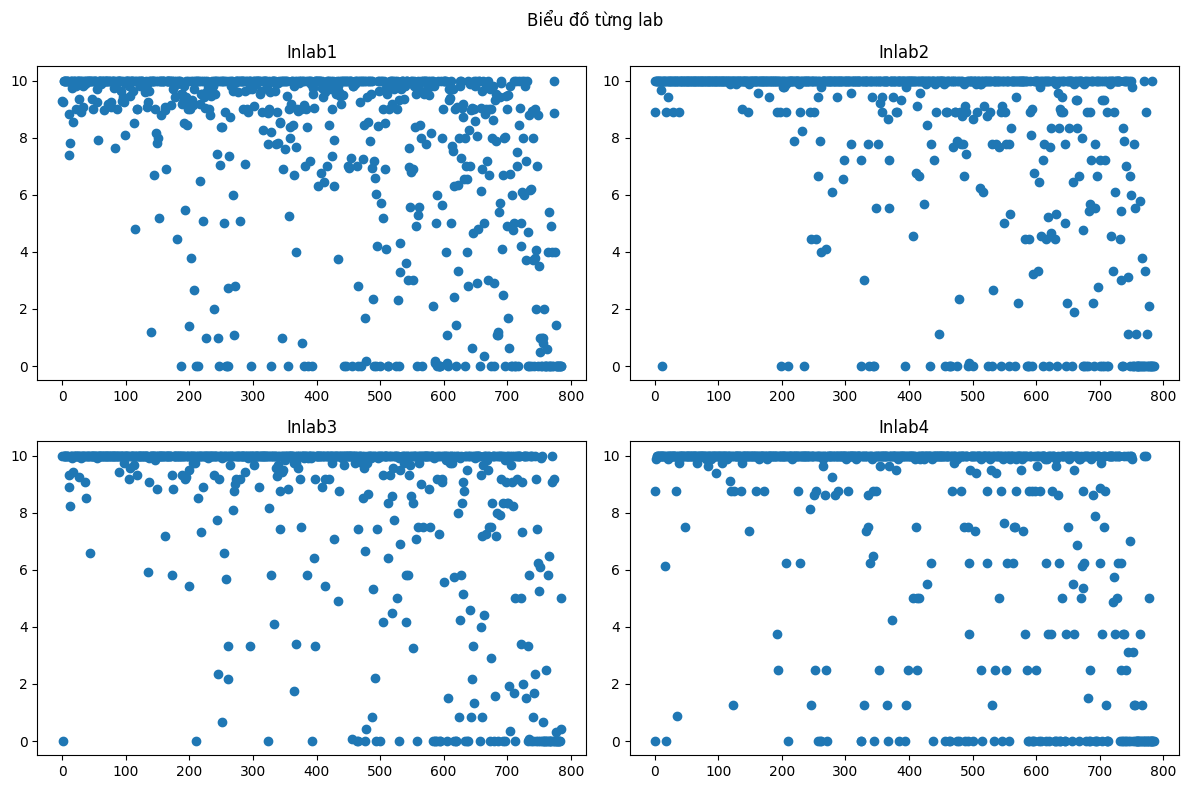

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Inlab1", "Inlab2", "Inlab3", "Inlab4"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df.index, df[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

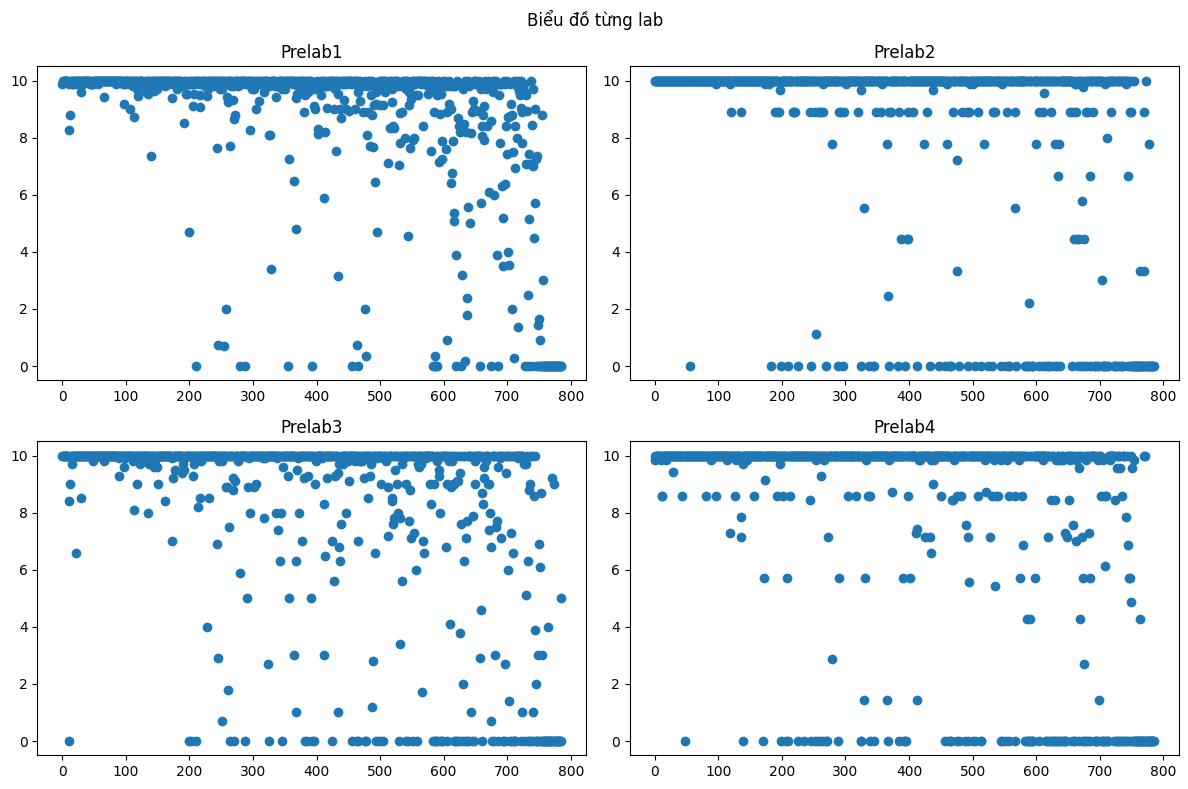

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Prelab1", "Prelab2", "Prelab3", "Prelab4"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df.index, df[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

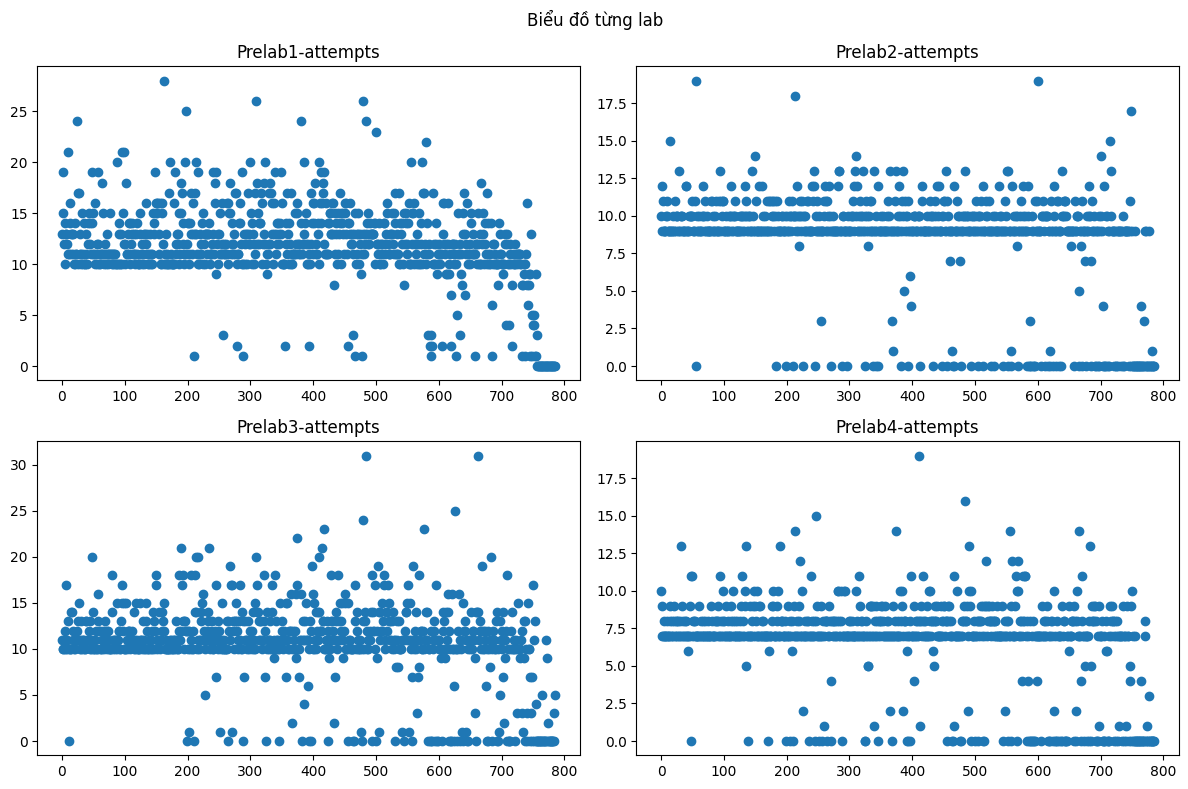

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Prelab1-attempts", "Prelab2-attempts", "Prelab3-attempts", "Prelab4-attempts"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df.index, df[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

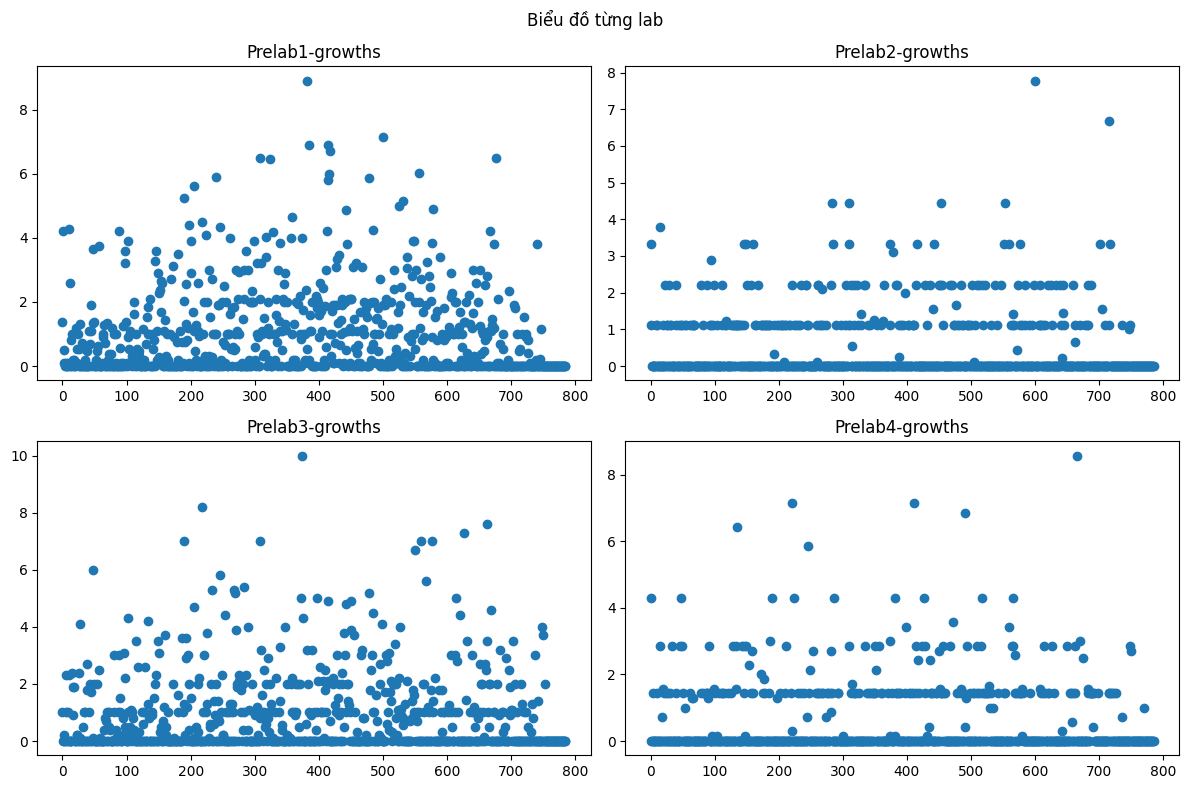

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Prelab1-growths", "Prelab2-growths", "Prelab3-growths", "Prelab4-growths"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df.index, df[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

In [ ]:
df= df.drop('studentID', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prelab1             786 non-null    float64
 1   Prelab1-attempts    786 non-null    float64
 2   Prelab1-questions   786 non-null    float64
 3   Prelab1-growths     786 non-null    float64
 4   Prelab1-timeSpent   786 non-null    float64
 5   Prelab1-lastSubmit  786 non-null    float64
 6   Inlab1              786 non-null    float64
 7   Inlab1-attempts     786 non-null    float64
 8   Inlab1-questions    786 non-null    float64
 9   Inlab1-growths      786 non-null    float64
 10  Inlab1-timeSpent    786 non-null    float64
 11  Inlab1-lastSubmit   786 non-null    float64
 12  Prelab2             786 non-null    float64
 13  Prelab2-attempts    786 non-null    float64
 14  Prelab2-questions   786 non-null    float64
 15  Prelab2-growths     786 non-null    float64
 16  Prelab2-

In [ ]:
X = df.values
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


In [ ]:

# Chọn các cột để thực hiện K-means
selected_columns = ['Inlab1', 'Inlab2','Inlab3','Inlab4','Prelab1','Prelab2','Prelab3','Prelab4']

# Lấy dữ liệu từ các cột đã chọn
X = df[selected_columns]

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Truy cập các trung tâm cụm
centers = kmeans.cluster_centers_

# Gán nhãn cụm cho mỗi điểm dữ liệu
labels = kmeans.labels_

# In kết quả
print("Trung tâm cụm:", centers)
print("Nhãn cụm:", labels)


Trung tâm cụm: [[9.55529533 9.8        9.80189252 9.625      9.81637757 9.90633437
  9.77607477 9.66461949]
 [1.42705063 1.73699015 1.36272152 0.79905063 2.39979747 0.59493671
  0.54936709 0.66184448]
 [3.80083951 8.07544582 9.01425926 8.89506173 8.31385185 9.5308642
  7.94444444 9.35802469]
 [6.05245714 6.42222222 8.30714286 8.81785714 7.31408571 0.0952381
  6.54857143 6.09795918]
 [6.59414286 7.46031746 4.96790179 3.875      7.46310714 8.96428571
  4.95       2.29336735]]
Nhãn cụm: [0 4 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0
 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 2 0 0 0 4 0 2 0 1 0 0 2 0 0 0 0 0 0 0 2
 0 0 0 0 3 0 0 0 0 0 0 0 0 4 0 0 0 2 0 0 0 0 2 1 2 0 0 0 0 0 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['Cluster'] = labels
class_0 = df[df['Cluster'] == 0]
class_1 = df[df['Cluster'] == 1]
class_2 = df[df['Cluster'] == 2]
class_3 = df[df['Cluster'] == 3]
class_4 = df[df['Cluster'] == 4]

In [ ]:
class_0

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster
0,9.900,13.0,10.0,1.364,550.133333,1.644752e+09,9.272,10.0,10.0,0.000,...,4.285714,72.166667,1.650386e+09,8.750,9.0,8.0,1.25,35.616667,1.651856e+09,0
1,10.000,19.0,10.0,4.200,579.316667,1.644850e+09,9.236,14.0,10.0,2.636,...,0.000000,0.150000,1.650339e+09,0.000,0.0,0.0,0.00,0.000000,0.000000e+00,0
2,10.000,15.0,10.0,0.500,148.933333,1.643299e+09,10.000,13.0,10.0,1.363,...,0.000000,118.950000,1.650177e+09,9.875,8.0,8.0,0.00,24.900000,1.651047e+09,0
3,10.000,12.0,10.0,0.100,22.600000,1.642844e+09,10.000,11.0,10.0,0.000,...,0.000000,0.383333,1.649640e+09,10.000,8.0,8.0,0.00,1.033333,1.649643e+09,0
4,10.000,10.0,10.0,0.000,3.100000,1.642775e+09,10.000,10.0,10.0,0.000,...,1.428571,40.916667,1.649903e+09,10.000,8.0,8.0,0.00,1.466667,1.650333e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1.455,5.0,4.0,0.000,30.833333,1.644858e+09,8.800,10.0,10.0,0.000,...,2.857143,12.400000,1.650253e+09,10.000,8.0,8.0,0.00,1.800000,1.650266e+09,0
750,1.655,4.0,4.0,0.000,25.466667,1.644858e+09,3.491,11.0,10.0,0.091,...,2.714286,85.533333,1.650471e+09,10.000,8.0,8.0,0.00,27.033333,1.651205e+09,0
754,8.800,9.0,9.0,0.000,0.066667,1.644853e+09,1.000,2.0,2.0,0.000,...,0.000000,0.066667,1.650374e+09,1.250,3.0,3.0,0.00,24.083333,1.651217e+09,0
764,0.000,0.0,0.0,0.000,0.000000,0.000000e+00,4.000,9.0,8.0,0.500,...,0.000000,25.033333,1.650473e+09,3.750,3.0,3.0,0.00,23.150000,1.650588e+09,0


In [ ]:
class_4

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster
55,10.000,10.0,10.0,0.000,526.900000,1.644682e+09,9.700,11.0,10.0,0.000,...,0.000000,1.483333,1.650296e+09,10.000,8.0,8.0,0.000,1.883333,1.651137e+09,4
183,9.900,13.0,10.0,1.100,227.500000,1.643828e+09,10.000,12.0,10.0,0.382,...,0.000000,3.750000,1.650274e+09,10.000,9.0,8.0,0.000,11.283333,1.650995e+09,4
226,9.900,12.0,10.0,2.000,447.416667,1.644649e+09,1.000,2.0,1.0,0.000,...,0.000000,105.500000,1.650473e+09,8.750,10.0,8.0,0.125,26.616667,1.650359e+09,4
296,8.255,17.0,10.0,2.355,468.316667,1.644858e+09,10.000,17.0,10.0,6.400,...,0.000000,24.016667,1.650468e+09,10.000,10.0,8.0,2.500,215.633333,1.652077e+09,4
337,9.900,13.0,10.0,3.000,371.166667,1.644672e+09,9.900,14.0,10.0,2.500,...,1.428571,0.133333,1.650209e+09,10.000,10.0,8.0,1.500,0.083333,1.651423e+09,4
343,10.000,12.0,10.0,1.100,398.766667,1.644712e+09,8.518,13.0,10.0,0.500,...,0.000000,2.266667,1.650297e+09,6.500,11.0,8.0,0.250,396.966667,1.651937e+09,4
382,9.500,11.0,10.0,0.545,321.783333,1.644671e+09,7.000,9.0,9.0,0.000,...,0.142857,0.700000,1.650300e+09,9.875,8.0,8.0,0.000,25.483333,1.650682e+09,4
413,8.200,19.0,10.0,4.218,274.333333,1.644848e+09,9.600,13.0,10.0,2.700,...,0.000000,0.000000,1.649822e+09,5.000,7.0,7.0,0.000,44.516667,1.651198e+09,4
433,3.155,8.0,7.0,0.650,131.333333,1.644454e+09,3.764,10.0,10.0,0.000,...,0.000000,24.483333,1.650460e+09,10.000,8.0,8.0,0.000,3.316667,1.650512e+09,4
447,9.000,15.0,10.0,2.100,204.683333,1.644858e+09,0.000,0.0,0.0,0.000,...,1.428571,11.100000,1.650294e+09,10.000,9.0,8.0,0.000,13.150000,1.650294e+09,4


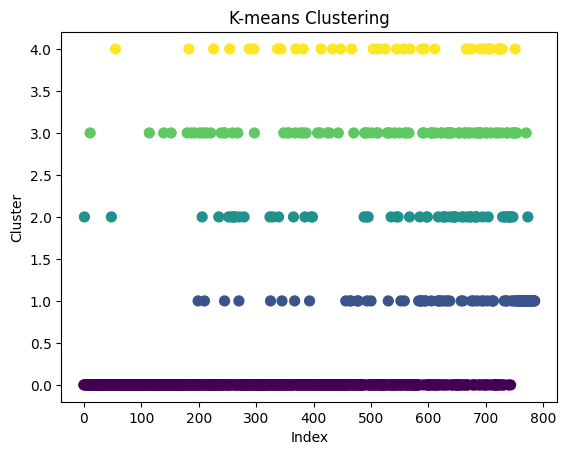

Cluster
0    534
3     81
1     79
2     56
4     36
Name: count, dtype: int64

In [ ]:
plt.scatter(df.index, df['Cluster'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Index')
plt.ylabel('Cluster')
plt.title('K-means Clustering')
plt.show()
df['Cluster'].value_counts()

In [ ]:
class_sizes = [class_df.shape[0] for class_df in [class_0, class_1, class_2, class_3, class_4]]
k = sum(class_sizes) // len(class_sizes)
print(" K là : " , k)

 K là :  157


In [ ]:
class_sizes = [class_df.shape[0] for class_df in [class_0, class_1, class_2, class_3, class_4]]
max = max(class_sizes)
min = min(class_sizes)
c = min / max
print('C là : ', c)

TypeError: 'int' object is not callable

In [ ]:
df.columns

Index(['Prelab1', 'Prelab1-attempts', 'Prelab1-questions', 'Prelab1-growths',
       'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1', 'Inlab1-attempts',
       'Inlab1-questions', 'Inlab1-growths', 'Inlab1-timeSpent',
       'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts', 'Prelab2-questions',
       'Prelab2-growths', 'Prelab2-timeSpent', 'Prelab2-lastSubmit', 'Inlab2',
       'Inlab2-attempts', 'Inlab2-questions', 'Inlab2-growths',
       'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3', 'Prelab3-attempts',
       'Prelab3-questions', 'Prelab3-growths', 'Prelab3-timeSpent',
       'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts', 'Inlab3-questions',
       'Inlab3-growths', 'Inlab3-timeSpent', 'Inlab3-lastSubmit', 'Prelab4',
       'Prelab4-attempts', 'Prelab4-questions', 'Prelab4-growths',
       'Prelab4-timeSpent', 'Prelab4-lastSubmit', 'Inlab4', 'Inlab4-attempts',
       'Inlab4-questions', 'Inlab4-growths', 'Inlab4-timeSpent',
       'Inlab4-lastSubmit', 'Cluster'],
  

In [ ]:
class_0_data = class_0[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions', 'Prelab1-growths',
       'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1', 'Inlab1-attempts',
       'Inlab1-questions', 'Inlab1-growths', 'Inlab1-timeSpent',
       'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts', 'Prelab2-questions',
       'Prelab2-growths', 'Prelab2-timeSpent', 'Prelab2-lastSubmit', 'Inlab2',
       'Inlab2-attempts', 'Inlab2-questions', 'Inlab2-growths',
       'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3', 'Prelab3-attempts',
       'Prelab3-questions', 'Prelab3-growths', 'Prelab3-timeSpent',
       'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts', 'Inlab3-questions',
       'Inlab3-growths', 'Inlab3-timeSpent', 'Inlab3-lastSubmit', 'Prelab4',
       'Prelab4-attempts', 'Prelab4-questions', 'Prelab4-growths',
       'Prelab4-timeSpent', 'Prelab4-lastSubmit', 'Inlab4', 'Inlab4-attempts',
       'Inlab4-questions', 'Inlab4-growths', 'Inlab4-timeSpent',
       'Inlab4-lastSubmit']]  # Thay thế 'column1', 'column2', ... bằng tên cột thực tế

num_clusters = round(k * c)

# Tạo mô hình K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

from sklearn.cluster import KMeans

# Tạo mô hình K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit mô hình vào dữ liệu của class_0
kmeans.fit(class_0_data)

# Gán nhãn cụm cho mỗi điểm dữ liệu trong class_0
labels = kmeans.labels_

# Thêm cột nhãn vào DataFrame class_0
class_0['Group'] = labels


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_9144/670123303.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0['Group'] = labels


In [ ]:
class_0['Group'].value_counts() # là chỉnh tính class_0 , class không là class có nhiều nhất ngay mất cân bằng 

Group
8     83
3     78
10    74
9     59
4     57
7     49
6     48
5     43
0     32
1      7
2      4
Name: count, dtype: int64

In [ ]:
# lấy tọa độ gần tâm
# Tọa độ của tâm nhóm
centroids = kmeans.cluster_centers_
from scipy.spatial.distance import cdist

# Tính khoảng cách giữa tất cả các điểm và tâm nhóm
distances = cdist(class_0_data, centroids)

# Lấy chỉ số của điểm gần tâm nhóm nhất trong mỗi nhóm
closest_points_indices = distances.argmin(axis=0)
representative_rows = class_0.iloc[closest_points_indices]
representative_rows


,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster,Group
253,10.0,11.0,10.0,0.100,15.700000,1.643069e+09,10.000,11.0,10.0,0.000,...,0.700000,1.650004e+09,10.00,9.0,8.0,0.0,1.650000,1.650335e+09,0,0
644,8.9,11.0,10.0,0.272,27.966667,1.644752e+09,9.036,13.0,10.0,1.636,...,0.000000,0.000000e+00,10.00,8.0,8.0,0.0,4.400000,1.650695e+09,0,1
438,8.7,10.0,10.0,0.000,95.400000,1.644330e+09,9.182,11.0,10.0,0.200,...,66.783333,1.650247e+09,0.00,0.0,0.0,0.0,0.000000,0.000000e+00,0,2
304,9.0,13.0,10.0,1.000,433.650000,1.644750e+09,9.900,16.0,10.0,3.809,...,133.316667,1.650163e+09,8.75,8.0,8.0,0.0,24.033333,1.651124e+09,0,3
319,10.0,10.0,10.0,0.000,13.766667,1.643180e+09,10.000,10.0,10.0,0.000,...,25.033333,1.650017e+09,10.00,8.0,8.0,0.0,2.716667,1.651140e+09,0,4
599,10.0,11.0,10.0,0.100,16.566667,1.644578e+09,9.000,11.0,10.0,0.200,...,7.166667,1.650332e+09,10.00,8.0,8.0,0.0,2.116667,1.650702e+09,0,5
487,10.0,15.0,10.0,1.000,279.766667,1.644562e+09,10.000,15.0,10.0,4.636,...,174.316667,1.650307e+09,7.50,7.0,7.0,0.0,45.033333,1.651890e+09,0,6
129,9.9,11.0,10.0,0.000,502.233333,1.644592e+09,9.800,10.0,10.0,0.000,...,11.883333,1.649858e+09,10.00,8.0,8.0,0.0,1.383333,1.651135e+09,0,7
236,9.9,10.0,10.0,0.000,10.133333,1.643031e+09,9.900,10.0,10.0,0.000,...,0.916667,1.649918e+09,10.00,8.0,8.0,0.0,1.950000,1.650681e+09,0,8
233,10.0,13.0,10.0,0.282,461.850000,1.644674e+09,8.791,11.0,10.0,0.000,...,43.566667,1.650021e+09,10.00,8.0,8.0,0.0,2.133333,1.650335e+09,0,9


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df['Cluster'].value_counts()

Cluster
0    534
3     81
1     79
2     56
4     36
Name: count, dtype: int64

In [ ]:
# Tính tâm của từng lớp
centroid_class_1 = df[df['Cluster'] == 1].mean()
centroid_class_2 = df[df['Cluster'] == 2].mean()
centroid_class_3 = df[df['Cluster'] == 3].mean()
centroid_class_4 = df[df['Cluster'] == 4].mean()

print("Centroid của Class 1:")
print(centroid_class_1)

print("\nCentroid của Class 2:")
print(centroid_class_2)

print("\nCentroid của Class 3:")
print(centroid_class_3)

print("\nCentroid của Class 4:")
print(centroid_class_4)


Centroid của Class 1:
Prelab1               2.399797e+00
Prelab1-attempts      4.784810e+00
Prelab1-questions     3.848101e+00
Prelab1-growths       3.745665e-01
Prelab1-timeSpent     6.845316e+01
Prelab1-lastSubmit    1.082564e+09
Inlab1                1.427051e+00
Inlab1-attempts       3.721519e+00
Inlab1-questions      3.139241e+00
Inlab1-growths        4.214464e-01
Inlab1-timeSpent      3.573945e+01
Inlab1-lastSubmit     1.186649e+09
Prelab2               5.949367e-01
Prelab2-attempts      9.240506e-01
Prelab2-questions     8.987342e-01
Prelab2-growths       3.516174e-02
Prelab2-timeSpent     4.545781e+00
Prelab2-lastSubmit    2.708039e+08
Inlab2                1.736990e+00
Inlab2-attempts       2.797468e+00
Inlab2-questions      2.670886e+00
Inlab2-growths        4.676512e-02
Inlab2-timeSpent      1.253713e+01
Inlab2-lastSubmit     8.126072e+08
Prelab3               5.493671e-01
Prelab3-attempts      1.075949e+00
Prelab3-questions     9.113924e-01
Prelab3-growths       9.240506e-0

In [ ]:
import numpy as np

# Giả sử centroids là các giá trị bạn đã tính trước đó
centroid_class_1 = df[df['Cluster'] == 1].mean()
centroid_class_2 = df[df['Cluster'] == 2].mean()
centroid_class_3 = df[df['Cluster'] == 3].mean()
centroid_class_4 = df[df['Cluster'] == 4].mean()

# Số lượng điểm dữ liệu bạn muốn sinh ra cho mỗi class
num_samples = 50

# Phân phối hiệp phương sai (covariance matrix) có thể được xác định dựa trên dữ liệu thực tế hoặc giả định
cov_matrix = np.cov(df.drop('Cluster', axis=1), rowvar=False)

# Sinh dữ liệu ngẫu nhiên từ phân phối Gaussian với tâm và ma trận hiệp phương sai
generated_data_class_1 = np.random.multivariate_normal(centroid_class_1[:-1], cov_matrix, num_samples)
generated_data_class_2 = np.random.multivariate_normal(centroid_class_2[:-1], cov_matrix, num_samples)
generated_data_class_3 = np.random.multivariate_normal(centroid_class_3[:-1], cov_matrix, num_samples)
generated_data_class_4 = np.random.multivariate_normal(centroid_class_4[:-1], cov_matrix, num_samples)

# Giới hạn giá trị phát sinh trong khoảng min và max của tập dữ liệu gốc
#min_values = [df['Cluster'] == 4 ].min()[:-1]
#max_values = [df['Cluster'] == 1 ].max()[:-1]

# Thay đổi min_values và max_values thành 0 và 7
min_values = [0] * len(df.columns[:-1])
max_values = [6] * len(df.columns[:-1])


generated_data_class_1 = np.clip(generated_data_class_1, min_values, max_values)
generated_data_class_2 = np.clip(generated_data_class_2, min_values, max_values)
generated_data_class_3 = np.clip(generated_data_class_3, min_values, max_values)
generated_data_class_4 = np.clip(generated_data_class_4, min_values, max_values)

# Tạo DataFrame cho dữ liệu mới
columns = df.columns[:-1]  # Loại bỏ cột 'Cluster' trong danh sách cột
generated_df_class_1 = pd.DataFrame(generated_data_class_1, columns=columns)
generated_df_class_1['Cluster'] = 1

generated_df_class_2 = pd.DataFrame(generated_data_class_2, columns=columns)
generated_df_class_2['Cluster'] = 2

generated_df_class_3 = pd.DataFrame(generated_data_class_3, columns=columns)
generated_df_class_3['Cluster'] = 3

generated_df_class_4 = pd.DataFrame(generated_data_class_4, columns=columns)
generated_df_class_4['Cluster'] = 4

# Kết hợp tất cả dữ liệu sinh ra thành một DataFrame lớn
generated_df = pd.concat([generated_df_class_1, generated_df_class_2, generated_df_class_3, generated_df_class_4], ignore_index=True)

# Hiển thị một số dòng đầu của DataFrame
generated_df


/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_9144/2743486337.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  generated_data_class_1 = np.random.multivariate_normal(centroid_class_1[:-1], cov_matrix, num_samples)
/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_9144/2743486337.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  generated_data_class_2 = np.random.multivariate_normal(centroid_class_2[:-1], cov_matrix, num_samples)
/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_9144/2743486337.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  generated_data_class_3 = np.random.multivariate_normal(centroid_class_3[:-1], cov_matrix, num_samples)
/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_9144/2743486337.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  generated_data_class_4 = np.random.multivariate_normal(centroid_class_4[:-1], cov_matri

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster
0,1.146502,5.308770,6.000000,0.585977,0.0,6.0,0.000000,6.000000,6.000000,6.000000,...,2.689732,6.0,6.0,0.0,6.000000,0.000000,6.000000,6.000000,0.0,1
1,0.000000,0.000000,3.145647,2.554743,6.0,6.0,4.274099,4.399818,0.000000,6.000000,...,6.000000,6.0,6.0,6.0,0.000000,2.338792,4.963119,6.000000,6.0,1
2,0.000000,0.000000,6.000000,0.000000,6.0,6.0,0.000000,0.000000,3.357338,0.000000,...,5.572195,0.0,0.0,6.0,0.000000,0.435292,0.000000,6.000000,0.0,1
3,2.011080,4.994278,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,0.000000,...,0.000000,0.0,6.0,6.0,2.505768,6.000000,0.000000,2.766031,6.0,1
4,4.047588,6.000000,6.000000,5.052694,6.0,6.0,6.000000,5.003207,0.000000,0.000000,...,6.000000,0.0,6.0,6.0,5.461469,0.000000,6.000000,6.000000,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.907912,6.000000,6.000000,0.000000,6.0,6.0,6.000000,6.000000,6.000000,3.346413,...,0.000000,6.0,6.0,0.0,0.000000,0.496331,0.000000,6.000000,6.0,4
196,6.000000,6.000000,0.000000,6.000000,6.0,6.0,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.0,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0,4
197,6.000000,6.000000,6.000000,0.000000,6.0,6.0,6.000000,6.000000,6.000000,0.000000,...,1.514388,6.0,6.0,6.0,6.000000,6.000000,4.818369,6.000000,6.0,4
198,2.765203,6.000000,6.000000,0.000000,6.0,6.0,0.000000,6.000000,6.000000,6.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.527712,6.000000,6.000000,6.0,4


In [ ]:
# Cộng generated_df vào df
df_random = pd.concat([df, generated_df], ignore_index=True)
df_random # 

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster
0,9.900000,13.0,10.0,1.364,550.133333,1.644752e+09,9.272,10.0,10.0,0.000000,...,4.285714,72.166667,1.650386e+09,8.750,9.0,8.000000,1.250000,35.616667,1.651856e+09,0
1,10.000000,19.0,10.0,4.200,579.316667,1.644850e+09,9.236,14.0,10.0,2.636000,...,0.000000,0.150000,1.650339e+09,0.000,0.0,0.000000,0.000000,0.000000,0.000000e+00,2
2,10.000000,15.0,10.0,0.500,148.933333,1.643299e+09,10.000,13.0,10.0,1.363000,...,0.000000,118.950000,1.650177e+09,9.875,8.0,8.000000,0.000000,24.900000,1.651047e+09,0
3,10.000000,12.0,10.0,0.100,22.600000,1.642844e+09,10.000,11.0,10.0,0.000000,...,0.000000,0.383333,1.649640e+09,10.000,8.0,8.000000,0.000000,1.033333,1.649643e+09,0
4,10.000000,10.0,10.0,0.000,3.100000,1.642775e+09,10.000,10.0,10.0,0.000000,...,1.428571,40.916667,1.649903e+09,10.000,8.0,8.000000,0.000000,1.466667,1.650333e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,5.907912,6.0,6.0,0.000,6.000000,6.000000e+00,6.000,6.0,6.0,3.346413,...,0.000000,6.000000,6.000000e+00,0.000,0.0,0.496331,0.000000,6.000000,6.000000e+00,4
982,6.000000,6.0,0.0,6.000,6.000000,6.000000e+00,0.000,6.0,0.0,0.000000,...,0.000000,0.000000,6.000000e+00,6.000,6.0,6.000000,6.000000,6.000000,6.000000e+00,4
983,6.000000,6.0,6.0,0.000,6.000000,6.000000e+00,6.000,6.0,6.0,0.000000,...,1.514388,6.000000,6.000000e+00,6.000,6.0,6.000000,4.818369,6.000000,6.000000e+00,4
984,2.765203,6.0,6.0,0.000,6.000000,6.000000e+00,0.000,6.0,6.0,6.000000,...,0.000000,0.000000,0.000000e+00,0.000,0.0,0.527712,6.000000,6.000000,6.000000e+00,4


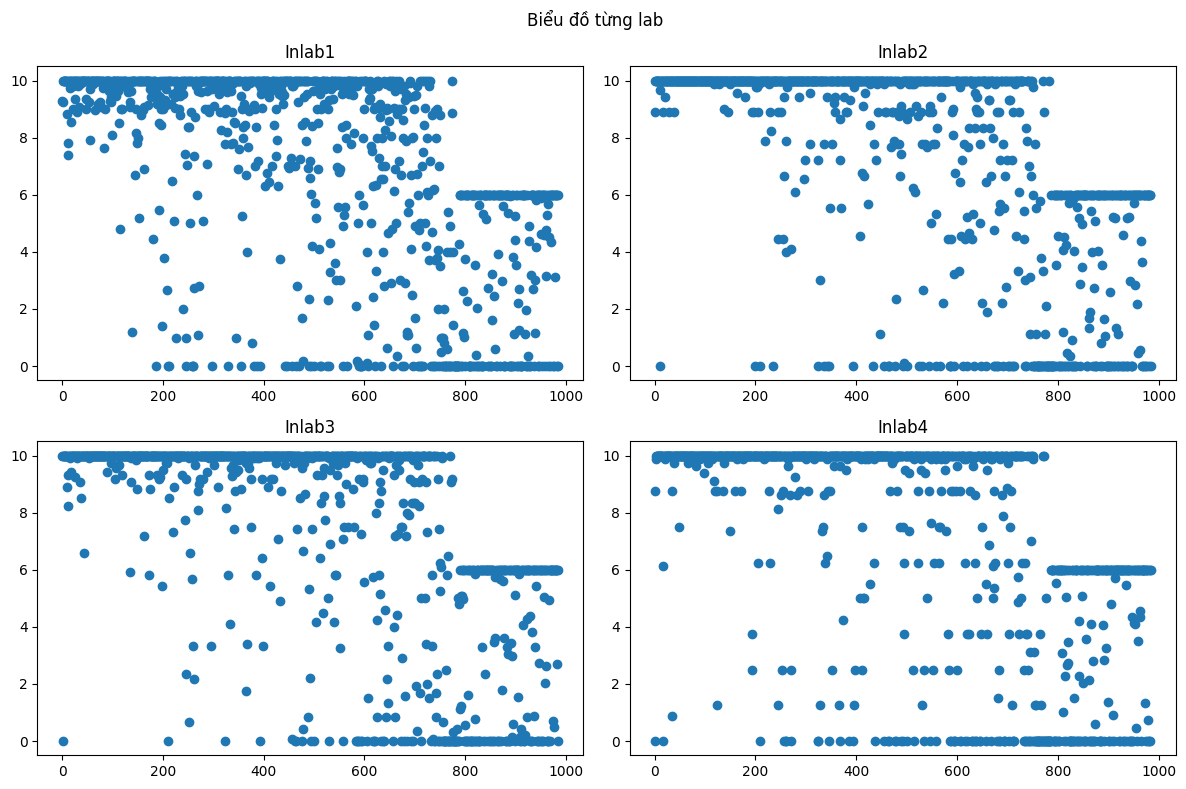

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Inlab1", "Inlab2", "Inlab3", "Inlab4"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df_random.index, df_random[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

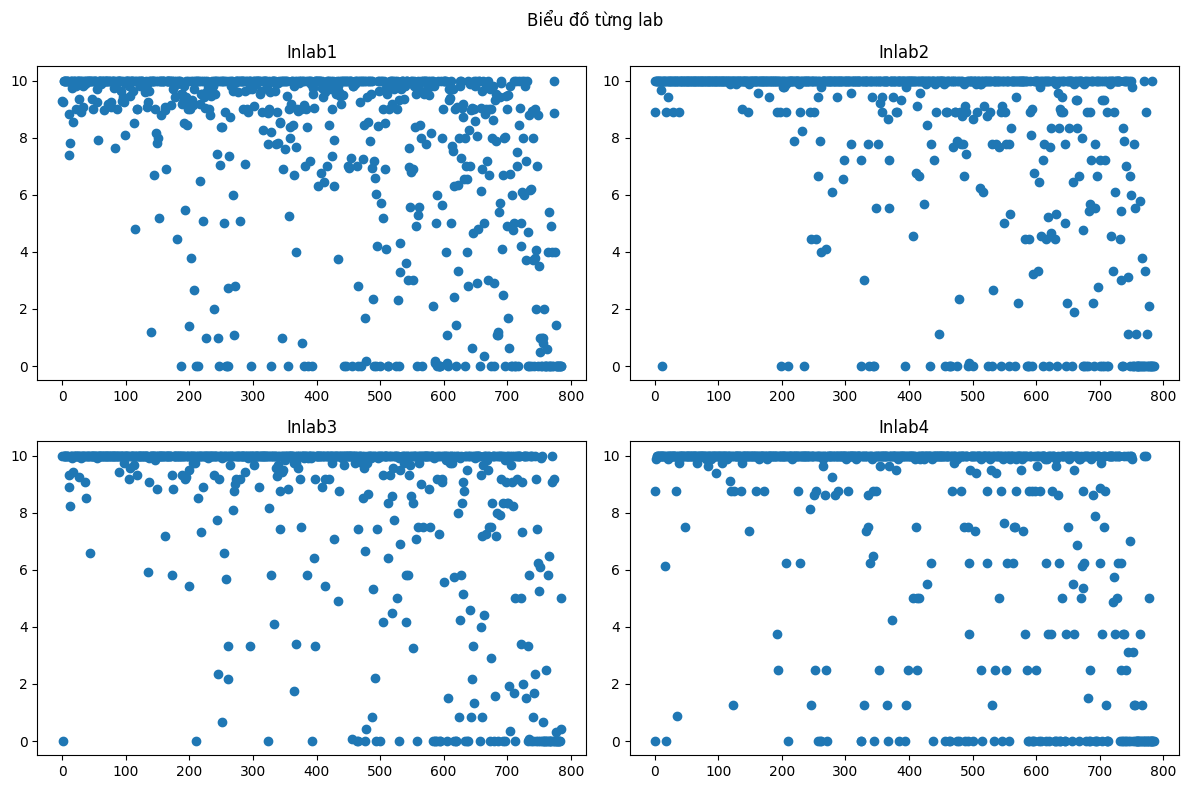

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Inlab1", "Inlab2", "Inlab3", "Inlab4"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df.index, df[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

In [ ]:
huy = df_random
def ranking(score):
    if score >= 8.5:
        return 4
    if score >= 7.0:
        return 3
    if score >= 5.5:
        return 2
    if score >= 4.0:
        return 1
    return 0
def passRanking(x):
    if x >= 5:
        return 1
    else:
        return 0
columns_to_rank = ['Inlab1', 'Inlab2', 'Inlab3', 'Inlab4']
for column in columns_to_rank:
    huy[column] = huy[column].apply(ranking)
huy = huy[huy['Prelab1-attempts']>5]
X4 = huy[['Prelab1', 'Prelab1-attempts', 'Prelab1-questions',
       'Prelab1-growths', 'Prelab1-timeSpent', 'Prelab1-lastSubmit', 'Inlab1',
       'Inlab1-attempts', 'Inlab1-questions', 'Inlab1-growths',
       'Inlab1-timeSpent', 'Inlab1-lastSubmit', 'Prelab2', 'Prelab2-attempts',
       'Prelab2-questions', 'Prelab2-growths', 'Prelab2-timeSpent',
       'Prelab2-lastSubmit', 'Inlab2', 'Inlab2-attempts', 'Inlab2-questions',
       'Inlab2-growths', 'Inlab2-timeSpent', 'Inlab2-lastSubmit', 'Prelab3',
       'Prelab3-attempts', 'Prelab3-questions', 'Prelab3-growths',
       'Prelab3-timeSpent', 'Prelab3-lastSubmit', 'Inlab3', 'Inlab3-attempts',
       'Inlab3-questions', 'Inlab3-growths', 'Inlab3-timeSpent',
       'Inlab3-lastSubmit', 'Prelab4', 'Prelab4-attempts', 'Prelab4-questions',
       'Prelab4-growths', 'Prelab4-timeSpent', 'Prelab4-lastSubmit']]
Y4 = huy['Inlab4']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4,stratify=Y4, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train4, y_train4)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_model = RandomForestClassifier(random_state=42,max_features=4, **best_params)
cross_val_scores = cross_val_score(best_rf_model, X_train4, y_train4, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())
best_rf_model.fit(X_train4, y_train4)
y_pred = best_rf_model.predict(X_test4)
accuracy_Random = accuracy_score(y_test4, y_pred)
print("Accuracy for Random Forest:", accuracy_Random)
print("Classification Report:\n", classification_report(y_test4, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Scores: [0.83453237 0.84172662 0.86231884 0.81884058 0.74637681]
Mean Cross-Validation Score: 0.8207590449379627
Accuracy for Random Forest: 0.815028901734104
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.44      0.51        27
           1       0.00      0.00      0.00         4
           2       0.57      0.65      0.60        20
           3       0.00      0.00      0.00         3
           4       0.89      0.97      0.93       119

    accuracy                           0.82       173
   macro avg       0.41      0.41      0.41       173
weighted avg       0.77      0.82      0.79       173



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
huy['Inlab4'].value_counts()

Inlab4
4    596
0    134
2     97
1     21
3     17
Name: count, dtype: int64

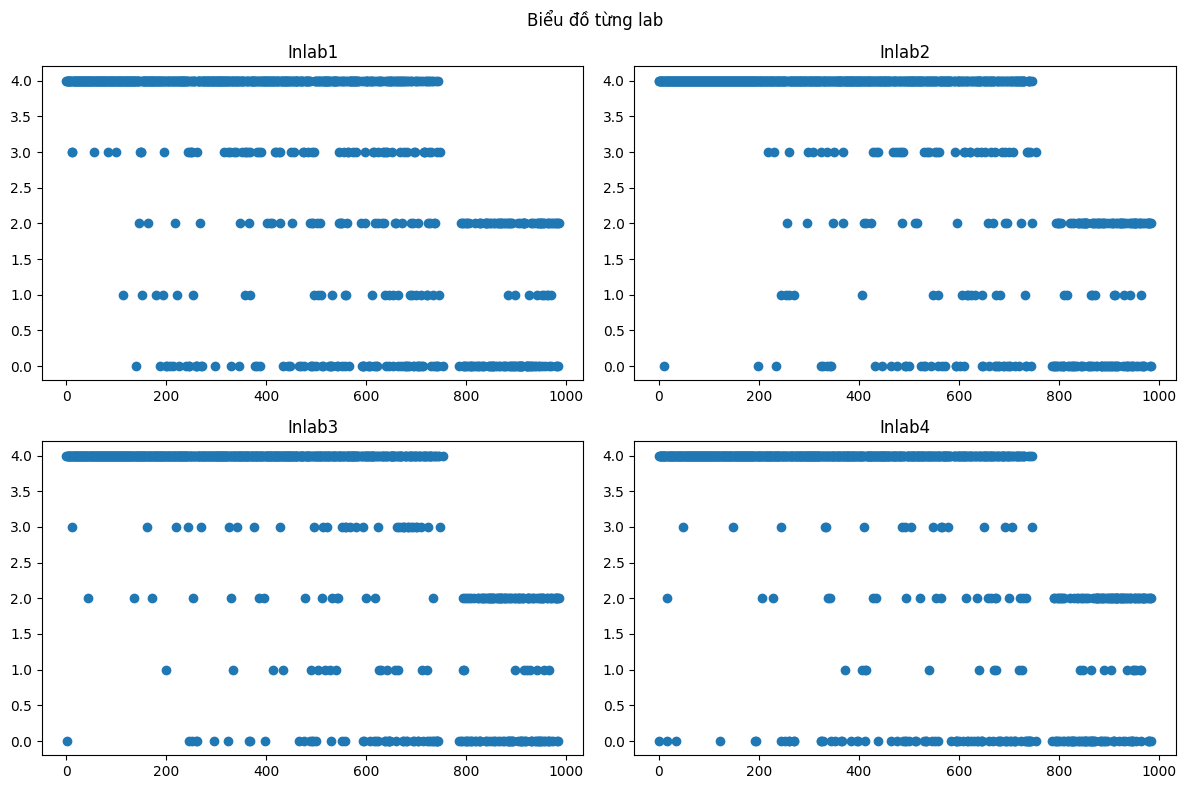

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
for i, column in enumerate(["Inlab1", "Inlab2", "Inlab3", "Inlab4"]):
    row, col = divmod(i, 2)
    axs[row, col].scatter(huy.index, huy[column], label=column)
    axs[row, col].set_title(column)
plt.suptitle('Biểu đồ từng lab')
plt.tight_layout()
plt.show()

In [ ]:
df_random['Inlab4'].value_counts()

Inlab4
4    610
0    220
3    106
2     30
1     20
Name: count, dtype: int64

In [ ]:
df['Inlab4'].value_counts()

Inlab4
4    610
0    127
2     21
3     17
1     11
Name: count, dtype: int64

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable

# Tính năng (features) của dữ liệu
num_features = len(df.columns) - 1

# Số lượng điểm dữ liệu bạn muốn sinh ra cho mỗi class
num_samples = 50

# Dữ liệu của từng class
class_1_data = df[df['Cluster'] == 1].iloc[:, :-1].values
class_2_data = df[df['Cluster'] == 2].iloc[:, :-1].values
class_3_data = df[df['Cluster'] == 3].iloc[:, :-1].values
class_4_data = df[df['Cluster'] == 4].iloc[:, :-1].values

# Hàm tạo mô hình sinh
def build_generator():
    return nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, num_features)
    )

# Hàm tạo mô hình phân biệt
def build_discriminator():
    return nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

# Mô hình và hàm mất mát
generator = build_generator()
discriminator = build_discriminator()
criterion = nn.BCELoss()
lr = 0.0002
optimizer_generator = optim.Adam(generator.parameters(), lr=lr)
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=lr)

# Hàm huấn luyện GAN
def train_gan(generator, discriminator, num_epochs=10000):
    for epoch in range(num_epochs):
        for class_data in [class_1_data, class_2_data, class_3_data, class_4_data]:
# Huấn luyện discriminator
            for data in class_data:
                real_data = Variable(torch.Tensor(data)).view(1, -1)
                real_label = Variable(torch.ones((1, 1)))  # Chỉnh kích thước nhãn

                discriminator.zero_grad()
                output = discriminator(real_data)
                loss_real = criterion(output, real_label)
                loss_real.backward()

                # Sinh dữ liệu giả mạo
                noise = Variable(torch.randn(1, num_features))
                fake_data = generator(noise)
                fake_label = Variable(torch.zeros((1, 1)))  # Chỉnh kích thước nhãn

                output = discriminator(fake_data.detach())
                loss_fake = criterion(output, fake_label)
                loss_fake.backward()

                optimizer_discriminator.step()

            # Huấn luyện generator
            generator.zero_grad()
            noise = Variable(torch.randn(1, num_features))
            fake_data = generator(noise)
            output = discriminator(fake_data)
            loss_generator = criterion(output, real_label)
            loss_generator.backward()
            optimizer_generator.step()


        # In thông tin sau mỗi 1000 epoch
        if epoch % 1000 == 0:
            print(f'Epoch [{epoch}/{num_epochs}] | Loss G: {loss_generator.item()} | Loss D Real: {loss_real.item()} | Loss D Fake: {loss_fake.item()}')

# Huấn luyện GAN
train_gan(generator, discriminator)

# Sinh dữ liệu mới từ generator
generated_samples = []
for _ in range(num_samples):
    noise = Variable(torch.randn(1, num_features))
    generated_data = generator(noise).detach().numpy()
    generated_samples.append(generated_data.flatten())

# Tạo DataFrame cho dữ liệu mới
generated_df = pd.DataFrame(generated_samples, columns=df.columns[:-1])
generated_df['Cluster'] = -1  # Gán nhãn cho dữ liệu mới, ví dụ -1

# In một số dòng đầu của DataFrame mới
generated_df


Epoch [0/10000] | Loss G: 0.9838597774505615 | Loss D Real: 100.0 | Loss D Fake: 0.4697228968143463


KeyboardInterrupt: 

In [ ]:
generated_df

,Prelab1,Prelab1-attempts,Prelab1-questions,Prelab1-growths,Prelab1-timeSpent,Prelab1-lastSubmit,Inlab1,Inlab1-attempts,Inlab1-questions,Inlab1-growths,...,Prelab4-growths,Prelab4-timeSpent,Prelab4-lastSubmit,Inlab4,Inlab4-attempts,Inlab4-questions,Inlab4-growths,Inlab4-timeSpent,Inlab4-lastSubmit,Cluster
0,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
1,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
2,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
3,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
4,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
5,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
6,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
7,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
8,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1
9,-0.000291,-0.000437,0.000536,-0.000356,-0.000522,0.000584,-0.000042,0.000345,0.000081,0.000427,...,-0.000507,0.000361,0.000527,0.000387,0.000150,0.000189,-0.000482,-0.000328,-0.000226,-1


In [ ]:
lấy thống kê ( data mining )
nhận xét nhiều hơn về bộ dữ liệu



